# **Numerical Optimization applied to Logistic Regression**

## **Requirements**

In [1]:
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from scipy.optimize import minimize
# from autograd import grad, hessian
# import autograd.numpy as np
from scipy.special import expit
from itertools import product
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
from sklearn.preprocessing import MinMaxScaler 

## **Binary Logistic Regression** 

### **Framework**

- We have a **binary**  response variable $\mathcal{Y}$ with domain $\lbrace 0, 1\rbrace$, and a $p$ predictors $\mathcal{X}_1,\dots,\mathcal{X}_p$.

- We have data  for the response and the predictors: $Y\in \mathbb{R}^n , \hspace{0.1cm} X\in \mathbb{R}^{n\times p}$.

- We are interestinfg in predict the probabilities of the response for specific individuals, based on their data of the predictors:

   $$P_r(x_i)=P(\mathcal{Y}=r | \mathcal{X}=x_i)\hspace{0.05cm},\quad i=1,\dots,n$$
   
   Where: $x_i\in \mathbb{R}^p$ is the $i$-th row of $X$ and $r=0,1$

### **How to define $P_r(x_i)$ ?**

There are two classic approaches, the naive one, based on Linear Regression and the one adopted in Logistic Regression.

#### **Naive approach: Linear Regression**

Under this approach:

$$P_0(x_i) = \beta_0 + x_i^\prime \cdot \beta$$

$$P_1(x_i) = 1 - P_0(x_i)$$

Where $\beta = (\beta_1,\dots , \beta_p)^\prime \in \mathbb{R}^p$.

We can estimate $\beta_0, \beta$ by Ordinary Least Squares, as usually in Linear Regression. Then we obtain the estimations $\widehat{\beta}_0, \widehat{\beta}$, and using them que can estimate the above probabilities:

$$\widehat{P}_0(x_i) = \widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}$$

$$\widehat{P}_1(x_i) = 1 - \widehat{P}_0(x_i)$$

**Problem of this approach:**

There is no guarantee of $\widehat{P}_r(x_i) \in [0,1]$ and since they are estimations of probabilities, this is not reasonable at all.


**Solution:** Logistic Regression.

#### **Logistic Regression approach**

In this approach:

$$P_1(x_i) =  \dfrac{e^{\beta_0 + x_i^\prime \cdot \beta}}{1+e^{\beta_0 + x_i^\prime \cdot \beta}}$$

$$P_0(x_i) =1-P_1(x_i) = \dfrac{1}{1+e^{\beta_0 + x_i^\prime \cdot \beta}}$$

Where:

$$f(x)=\dfrac{e^x}{1+e^x} \in [0,1], \hspace{0.1cm}\forall x\in \mathbb{R}$$

is the logistic function.

### **Model estimation**

The Maximum Likelihood Method is used.

Consider a s.r.s. $\mathcal{Y}_1,\dots,\mathcal{Y}_n$ of $\mathcal{Y}$.

Since $\mathcal{Y} | \mathcal{X}=x_i \sim Ber(P_1(x_i))$, then, because of they are identically distributed to $\mathcal{Y}$, is fulfilled:

$$\mathcal{Y}_i| \mathcal{X}=x_i \sim Ber(P_1(x_i))\hspace{0.05cm}, \quad \forall j=1,\dots,n$$

The density function of $\mathcal{Y}_i| \mathcal{X}=x_i$ is:

$$f_{\mathcal{Y}_i| \mathcal{X}=x_i }(y) = P_1(x_i)^{y} \cdot P_0(x_i)^{1-y}$$

Where $y=0,1$.

The Likelihood function of the simple random sample (s.r.s.) is:

$$\mathcal{L}(\beta_0,\beta) = f_{\mathcal{Y}_1,\dots,\mathcal{Y}_n| \mathcal{X}=x_i}(y_1,\dots, y_n) = \prod_{i=1}^n f_{\mathcal{Y}_i| \mathcal{X}=x_i }(y_i) = \prod_{j=1}^n  P_1(x_i; \beta_0,\beta)^{y_i} \cdot P_0(x_i; \beta_0,\beta)^{1-y_i}$$

The log Likelihood is given by:

$$log(\mathcal{L}(\beta_0, \beta)) = log\left( \prod_{i=1}^n  P_1(x_i; \beta_0,\beta)^{y_i} \cdot P_0(x_i; \beta_0,\beta)^{1-y_i} \right) = \sum_{i=1}^n log\left(P_1(x_i; \beta_0,\beta)^{y_i} \cdot P_0(x_i; \beta_0,\beta)^{1-y_i}\right) = \\[0.5cm]
= \hspace{0.1cm} \sum_{i=1}^n \hspace{0.05cm} y_i\cdot log\big(P_1(x_i; \beta_0,\beta)\big) \hspace{0.1cm} + \hspace{0.1cm} \sum_{i=1}^n \hspace{0.05cm} (1-y_i)\cdot log\big(1- P_1(x_i; \beta_0,\beta)\big)

The estimation of $\beta_0 , \beta$ is given by:

$$\widehat{\beta}_0 , \widehat{\beta} \hspace{0.1cm} =\hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta_0, \beta}{Max} \hspace{0.1cm} \mathcal{L}(\beta_0,\beta) \hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta_0, \beta}{Max} \hspace{0.1cm} log(\mathcal{L}(\beta_0, \beta)) \\[0.4cm]
\hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta_0, \beta}{Max} \hspace{0.1cm} \Big[\sum_{i=1}^n \hspace{0.05cm} y_i\cdot log\big(P_1(x_i; \beta_0,\beta)\big) \hspace{0.1cm} + \hspace{0.1cm} \sum_{i=1}^n \hspace{0.05cm} (1-y_i)\cdot log\big( 1-P_1(x_i; \beta_0,\beta)\big) \Big] \\[0.4cm]
\hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta_0, \beta}{Max} \hspace{0.1cm} \Big[\sum_{i=1}^n \hspace{0.05cm} y_i\cdot log\left(\dfrac{e^{\beta_0 + x_i^\prime \cdot \beta}}{1+e^{\beta_0 + x_i^\prime \cdot \beta}}\right) \hspace{0.1cm} + \hspace{0.1cm} \sum_{i=1}^n \hspace{0.05cm} (1-y_i)\cdot log\left(\dfrac{1}{1+e^{\beta_0 + x_i^\prime \cdot \beta}}\right)  \Big]  \quad (1)$$

Observation:

$$\beta_0 + x_i^\prime \cdot \beta = (1,x_i^\prime)\cdot (\beta_0, \beta^\prime)^\prime = (1, x_{i1},\dots, x_{ip})\cdot \begin{pmatrix}
    \beta_0 \\
    \beta_1 \\
    \dots \\
    \beta_p
\end{pmatrix}$$

An this is what we will use in the coding part.

### **Model predictions**

We have two options: 

1. Predict $P_r(x_i)$ $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ **Regression** 

2. Predict $\mathcal{Y}$  $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ **Classification** 



#### Predicting $P_r(x_i)$ 

Given $x_i \in \mathbb{R}^p$,

$$\widehat{P}_0(x_i) = \dfrac{e^{\widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}}}{1+e^{\widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}}}$$

$$\widehat{P}_1(x_i) = 1 - \widehat{P}_0(x_i) = \dfrac{1}{1+e^{\widehat{\beta}_0 + x_i^\prime \cdot \widehat{\beta}}}$$


#### Predicting $\mathcal{Y}$ 



Given $x_i \in \mathbb{R}^p$,

$$\widehat{y}_i \hspace{0.1cm}=\hspace{0.1cm} arg \hspace{0.1cm}\underset{r=0,1}{Max} \hspace{0.1cm}\widehat{P}_r(x_i)$$

In other words, $\widehat{y}_i$ is the category with higher predicted probability for $x_i$.

### The optimization problem to solve

The optimization problem that we are going to solve along this project is (1), but expressing it as a minimization problem an in a matrix form, since its the most efficient computational way to address it.

Now we are going to change the definition of some terms a little bit:



- $\beta \leftarrow (\beta_o, \beta^\prime)=(\beta_0, \beta_1, \dots, \beta_p)^\prime$



- $X \leftarrow (1, X)$

   - Therefore, now: $x_i \leftarrow (1, x_i^\prime)^\prime$

Taking this into account, the optimization problem that we want to solve is:

$$\widehat{\beta} \hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta}{Max} \hspace{0.1cm} log(\mathcal{L}(\beta)) \hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta_0, \beta}{Min} \hspace{0.1cm} - log(\mathcal{L}(\beta)) =  \\[0.4cm]
\hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta}{Min} \hspace{0.1cm} - \Big[\sum_{i=1}^n \hspace{0.05cm} y_i\cdot log\left(\dfrac{e^{ x_i^\prime \cdot \beta}}{1+e^{ x_i^\prime \cdot \beta}}\right) \hspace{0.1cm} + \hspace{0.1cm} \sum_{i=1}^n \hspace{0.05cm} (1-y_i)\cdot log\left(\dfrac{1}{1+e^{ x_i^\prime \cdot \beta}}\right)  \Big]  =  \\[0.4cm]
\hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta}{Min} \hspace{0.1cm} -\Big[\hspace{0.05cm}   Y \cdot log(P_1) + (1-Y)\cdot log(1-P_1) \hspace{0.05cm} \Big]
$$

where: 

$$P_1 \hspace{0.06cm} = \hspace{0.06cm}  \dfrac{e^{ X \cdot \beta}}{1+e^{ X \cdot \beta}}\hspace{0.06cm} = \hspace{0.06cm}  \big(P_1(x_i) : i=1,\dots, n\big)^\prime$$

The **gradient** of $f(\beta) = - log(\mathcal{L}(\beta))$ is:


$$\nabla f(\beta) \hspace{0.06cm} = \hspace{0.06cm}   X^\prime \cdot (P_1-Y)$$



The **hessian** of $f(\beta) = - log(\mathcal{L}(\beta))$ is:


$$\nabla^2 f(\beta) \hspace{0.06cm} = \hspace{0.06cm}   X^\prime \cdot D \cdot X$$

where:

$$D= diag(P_1\cdot (1-P_1))$$

Some documentation to support this part: https://stats.stackexchange.com/questions/68391/hessian-of-logistic-function

## **Numerical optimization algorithms**

### **Framework**


We are focused in the non-linear optimization scenario, whose framework is the following:

$$\underset{x\in A}{Min} f(x) \hspace{0.3cm}\big(\equiv\hspace{0.1cm}  \underset{x\in A}{Max} - f(x) \hspace{0.05cm} \big) \hspace{0.3cm} (\text{I})$$

where:

- $f: D_f \subset \mathbb{R}^p \rightarrow \mathbb{R}$

- $A\subset \mathbb{R}^p$ contains the constraints imposed to $x$. Which could be $A=\mathbb{R}^p$ if it is an unconstrained problem.

- $f$ has continuous second order derivatives.

- $f(x) > \infty, \hspace{0.15cm} \forall x \in A$

- $\underset{x \rightarrow \infty}{lim} f(x) = \infty$

### **Optimality conditions**

The optimality conditions in this scenario are the following:

- **First-order necessary conditions:**

   - If $x^*$ is a local minimizer  $\Rightarrow$ $\nabla f(x^*)=0\quad (NC1)$ 

- **Second-order necessary conditions:**

   - If $x^*$ is a local minimizer $\Rightarrow$ $\nabla^2 f(x^*) \succeq 0\quad (NC2)$ 

The importance of the necessary condition is summarized as follows:

- The local minimizers of $f$ are contain in $NC1 \cap NC2$, namely, in the set of points $x$ that satisfy $NC1$ and $NC2$ simultaneously.

- **Second-order sufficient conditions:**

  - If $\hspace{0.1cm}\begin{cases} \nabla f(x^*)=0 \hspace{0.2cm} (SC1) \\[0.1cm] \nabla^2 f(x^*)\succ 0 \hspace{0.2cm} (SC2)\end{cases}$ 
  $\hspace{0.15cm}\Rightarrow\hspace{0.15cm}$ $x^*$ is a  local minimizer.

**Definite property for matrices:**

Given an square matrix $M_{p\times p}$ (like the hessian), with eigenvalues $\lambda_1, \dots , \lambda_p$.

- $M$ is positive definite $(M\succ 0)$ $\hspace{0.12cm}\Leftrightarrow\hspace{0.12cm}$ $\lambda_i > 0, \forall i=1,\dots ,p$

- $M$ is semi positive definite $(M\succeq 0)$ $\hspace{0.12cm}\Leftrightarrow\hspace{0.12cm}$ $\lambda_i \geq 0, \forall i=1,\dots ,p$

- $M$ is negative definite $(M\prec 0)$ $\hspace{0.12cm}\Leftrightarrow\hspace{0.12cm}$ $\lambda_i < 0, \forall i=1,\dots ,p$

- $M$ is semi negative definite $(M\preceq 0)$ $\hspace{0.12cm}\Leftrightarrow\hspace{0.12cm}$ $\lambda_i \leq 0, \forall i=1,\dots ,p$

**Singular points:**

They are local minimizers $x^*$ such that:

$$\nabla f(x^*)=\nabla^2 f(x^*)=0$$

In other words, they are local minimizer that don't satisfy the sufficient conditions.

These point are very difficult to explore.

### **Local and Global solutions**

**Why we talk about local solutions but not global?**

- Globals solutions are in general difficult to identify and to locate, except in convex optimization (but our optimization problem is not convex). 

- Local solution are "easy" to find (much more than global ones) , but there is not guarantee to be the best.



**Recap about local and global solutions:**



- **Local solutions:**

  $x^*$ is a local solution of $(\text{I})$ if and only if:

  - $x^* \in A,\hspace{0.1cm}$ i.e. $x^*$ is feasible.

  - $\exists \hspace{0.1cm} \varepsilon >0, \hspace{0.1cm} \forall x\in B(x^*, \epsilon)\cup A,\hspace{0.1cm} f(x^*) \leq f(x)$

  where: $\hspace{0.1cm}B(x*, \varepsilon) = (x^*-\epsilon, \hspace{0.1cm} x^*+\varepsilon)$

- **Global solutions:**

   $x^*$ is a global solution of $(\text{I})$ if and only if:

  - $x^* \in A,\hspace{0.1cm}$ i.e. $x^*$ is feasible.

  - $\forall x\in A,\hspace{0.1cm} f(x^*) \leq f(x)$

### **Most important Numerical Optimization algorithms**

The main goal of numerical optimization algorithms is to find a vector of decision variables $x^*$ close enough to be a local solution of optimization problems. In the non-linear case this mains to find $x^*$ close enough to satisfy the (local) sufficient conditions seen above.


In the following section section we are going to implement several numerical optimization algorithm, that are specially powerful to solve non-linear optimization problems, like our problem.

The implemented algorithms (methods) are the following: 

- Gradient Descent

- Coordinate Descent

- Stochastic Gradient Descent (Mini-Batch)

- Newton Method

- Stochastic Newton Method (Hessian-Free Inexact Newton)

- Quasi-Newton Method

- Stochastic Quasi-Newton Method

The basic iterative procedure of these algorithms is:

$$x_{k+1} = x_{k} + \alpha_k \cdot p_k, \quad \small{k=0,1,2,\dots}$$

where: 

- $k$ is the index that represent the algorithm iterations.

- $p_k$ is the search direction.

- $\alpha_k$ the step-length.

These algorithms try to move $f$ closer to a local solution with each iteration, until its value converge to a certain value.

It's important that the algorithm has a convergence to a local solution regardless of the initial point $x_0$.

**Definition of $p_k$**

Depend on the specific algorithm.

- **Gradien descent**

    $$p_k = - \nabla f(x_k)$$

- **Newtons method**

   $$p_k = - (\nabla^2 f(x_k))^{-1}\cdot \nabla f(x_k)$$

- **Quasi-Newton's method**

   $$p_k = - B_k^{-1} \cdot \nabla f(x_k)$$

   - BFGS rule:

     $$B_{k+1} = B_k - \dfrac{(B_k \cdot s_k)\cdot (B_k\cdot s_k)^\prime}{s_k^\prime \cdot B_k \cdot s_k} + \dfrac{y_k \cdot y_k^\prime}{y_k^\prime \cdot s_k}$$

   - Symmetric rank-one rule:

      $$B_{k+1} = B_k - \dfrac{(y_k - B_k \cdot s_k)\cdot (y_k - B_k \cdot s_k)^\prime}{(y_k - B_k \cdot s_k)^\prime \cdot s_k} $$

   where: $s_k = x_{k+1} - x_k$ and $y_k = \nabla f(x_{k+1}) - \nabla f(x_k)$.

- **Coordinate Descent** 

   $$p_k = - \nabla_{j(k)} f(x_k) \cdot e_{j(k)}$$

   where:

   - $e_{j(k)}$ is the $j(k)$-th canonical vector of size $p$

   - $j(k)$ is chosen randomly among $[0,p]$

   - $\nabla_{j(k)} f(x_k) \hspace{0.05cm}=\hspace{0.05cm} \dfrac{\partial f(x_k)}{\partial x_{k_{j(k)}}}$

- **Stochastic Gradient Descent (Mini-Batch)**

   $$p_k = - \widetilde{\nabla} f(x_k)_{S_k}$$

   where:

    - $\widetilde{\nabla} f(x_k)_{S_k}$ is an estimation of $\nabla f(x_k)$ using a random sample  $S_k$ of the data $(X,Y)$, one in each iteration.



- **Stochastic Gradient Descent (Mini-Batch with momentum)**

     $$x_{k+1} = x_{k} + \alpha_k \cdot p_k + m_k, \quad \small{k=0,1,2,\dots}$$

     $$m_k = \begin{cases} \gamma \cdot (x_k - x_{k-1}), \hspace{0.2cm} \small{k=1,2,\dots} \\
      0, \hspace{0.2cm} \small{k=0} \end{cases}$$


- **Stochastic Newton Method**

   $$p_k = - \left(\widetilde{\nabla}^2 f(x_k)_{S_k^H}\right)^{-1} \cdot \widetilde{\nabla} f(x_k)_{S_k}$$

   where:

   - $S_k$ is a sample of the data $(X,Y)$ used to estimate the gradient.

   - $S_k^H$ is another sample of the data $(X,Y)$ used to estimate the hessian.

**Definition of $\alpha_k$: Armijo Rule**

Initialize $\alpha_0$

For $k=0,1,2,\dots$

 - If $\hspace{0.1cm}f(x_{k} + \alpha_k \cdot p_k) \hspace{0.1cm}>\hspace{0.1cm} f(x_k) + \sigma \cdot \alpha_k\cdot (p_k^\prime \cdot p_k)$ $\hspace{0.15cm}\Rightarrow\hspace{0.15cm}$ $\alpha_{k+1} = \alpha_k \cdot \phi^{k+1}$

 - Else $\hspace{0.15cm}\Rightarrow\hspace{0.15cm}$ $\alpha_{k+1}=\alpha_k$

Usually values for the parameters:

- $\phi \in \left[0.1 , \hspace{0.08cm} 0.5\right]$

- $\sigma \in \left[10^{-5}, \hspace{0.08cm} 10^{-1}\right]$


## **Optimizing Logistic Regression**

### **Initial elements**

In this section we are going to define some important elements that are strictly necessary to solve our optimization problem with some of the numerical optimization algorithms that we will use. These are:

- The objective function 

- The gradient of the objective function

- The hessian of the objective function

In [2]:
# Logistic function
'''
def logistic(x):
    return np.exp(x) / (1+np.exp(x))
'''

# To avoid numerical problems we will use the Scipy implementations of the logistic function
def logistic(x):
    return expit(x)


# Get data
def get_data(n, p, seed):

    np.random.seed(seed)
    Y = np.random.randint(0,2, n)
    X = np.random.normal(loc=0.0, scale=1.0, size=(n,p))
    ones = np.ones(n).reshape(n,1)
    X = np.hstack((ones, X)) # (1,X)
    initial_betas = np.random.randint(-10, 10, p+1) # (beta_0, beta)
    Y = X @ initial_betas
    noise = np.random.normal(loc=0, scale=2, size=n)
    Y = Y + noise
    Y = np.apply_along_axis(arr=Y, func1d=logistic, axis=0)
    Y = np.random.binomial(n=1, p=Y)

    return X, Y, initial_betas

# Objective function in element format
'''
def minus_logL(betas, X, Y):
    n = len(X)
    p1 = np.e**(X @ betas) / (1 + np.e**(X @ betas))
    sum1 = np.sum([Y[i]*np.log(p1[i]) for i in range(0,n)])
    sum2 = np.sum([(1-Y[i])*np.log(1-p1[i]) for i in range(0,n)])
    result = - (sum1 + sum2)
    return result
'''

# Objective function in matrix format
def minus_logL(betas, *args):
    X, Y = args
    epsilon = 1e-15
    p1 = logistic(X @ betas) 
    sum1 = Y @ np.log(p1 + epsilon)
    sum2 = (1-Y)  @ np.log(1 - p1 + epsilon)
    result = - (sum1 + sum2)
    return result


# Gradient of the objective function
def gradient_function(betas, *args):
    X, Y = args
    p1 = logistic(X @ betas) 
    gradient = X.T @ (p1 - Y)
    return gradient

# Derivative if the Log-Likelihood
def deriv_function(betas, j, *args):
    X, Y = args
    p1 = logistic(X @ betas) 
    derivative = X[:,j].T @ (p1 - Y)
    return derivative

# Gradient with autograd (doesn't work well with big data, almost in this case)
'''
gradient_autograd = grad(minus_logL_autograd, argnum=0) # argnum=0 to indicate that we want the gradient
'''

# Hessian of the objective function
def hessian_function(betas, *args):
    X, Y = args
    p1 = logistic(X @ betas) 
    D = np.diag(p1 * (1 - p1))
    hessian = X.T @ D @ X
    return hessian

# Hessian with autograd (doesn't work well with big data, almost in this case)
'''
hessian_autograd = hessian(minus_logL_autograd, argnum=0) # argnum=0 to indicate that we want the Hessian of minus_logL with respect to the first variable (betas)
'''

'\nhessian_autograd = hessian(minus_logL_autograd, argnum=0) # argnum=0 to indicate that we want the Hessian of minus_logL with respect to the first variable (betas)\n'

Now we get the data with which we are going to work. Our initial idea was considering real big data to force the algorithms and make the project more realistic, but the computational time needed to run the whole notebook was too much, so that we decided to try with "big data", but not too much big data, concretely with $n=30000$ and $p=25$.

In [3]:
X, Y, initial_betas = get_data(n=30000, p=25, seed=123)

### **`Sklearn` and `Scipy` optimization**

In this section we are going to solve our optimization problem using the libraries `Sklearn` and `Scipy`, and collect interesting information regarding to it, that will be used in subsequent section more focused in analytics.

These result will be consider as a benchmark (a reference to compare our developments).

In [4]:
benchmark_results = {}
benchmark_methods = ['sklearn', 'scipy_BFGS', 'scipy_Newton-CG', 'scipy_L-BFGS-B', 'scipy_SLSQP']

# BFGS := Broyden–Fletcher–Goldfarb–Shanno algorithm
# Newton-CG := Newton Conjugate Gradient algorithm
# L-BFGS-B := Limited memory BFGS
# SLSQP := Sequential Least Squares Programming 

for method in benchmark_methods:

    start_time = time.time()
    if method == 'sklearn':
        logistic_regression = LogisticRegression(fit_intercept=False, penalty=None)
        logistic_regression.fit(X=X, y=Y)
        benchmark_results[method] = {}
        benchmark_results[method]['x'] = logistic_regression.coef_[0]
        benchmark_results[method]['fun'] = minus_logL(logistic_regression.coef_[0], X, Y)

    elif method == 'scipy_Newton-CG':
        benchmark_results[method] = minimize(fun=minus_logL, x0=initial_betas, method=method.split('_')[1], jac=gradient_function, hess=hessian_function, args=(X,Y))

    else:
        benchmark_results[method] = minimize(fun=minus_logL, x0=initial_betas, method=method.split('_')[1], args=(X,Y))
    end_time = time.time()
    benchmark_results[method]['time'] = end_time - start_time

In [5]:
benchmark_results['sklearn']

{'x': array([ 5.28803335,  5.31456709,  5.25690809,  0.02897051, -5.23539119,
        -2.71234298, -5.9467545 ,  2.63827799, -6.58206716,  5.98875997,
         4.58747174,  3.24867487,  0.67856699, -3.25560885,  1.32075729,
         1.29431084, -0.59910036, -6.59266532,  3.30147313, -4.60156969,
        -6.61433056,  4.6290872 ,  3.93758349, -0.56097163,  1.33033932,
         1.93490455]),
 'fun': 1863.1467847925437,
 'time': 0.043999671936035156}

In [6]:
benchmark_results['scipy_BFGS']

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1863.146784791233
        x: [ 5.288e+00  5.315e+00 ...  1.330e+00  1.935e+00]
      nit: 42
      jac: [-1.526e-05  1.526e-05 ...  1.526e-05  0.000e+00]
 hess_inv: [[ 7.377e-03  3.436e-03 ... -1.059e-03  2.509e-03]
            [ 3.436e-03  4.182e-03 ... -5.560e-04  1.533e-03]
            ...
            [-1.059e-03 -5.560e-04 ...  1.933e-03 -4.331e-04]
            [ 2.509e-03  1.533e-03 ... -4.331e-04  2.938e-03]]
     nfev: 2133
     njev: 79
     time: 4.999240159988403

In [7]:
benchmark_results['scipy_Newton-CG']

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1863.146785187762
       x: [ 5.288e+00  5.314e+00 ...  1.330e+00  1.935e+00]
     nit: 8
     jac: [ 1.381e-03  3.739e-03 ...  8.935e-03  2.601e-03]
    nfev: 10
    njev: 10
    nhev: 8
    time: 19.65959930419922

In [8]:
benchmark_results['scipy_L-BFGS-B']

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 1863.1467847986262
        x: [ 5.288e+00  5.315e+00 ...  1.330e+00  1.935e+00]
      nit: 13
      jac: [ 3.411e-04 -3.183e-04 ... -5.684e-04  1.137e-04]
     nfev: 459
     njev: 17
 hess_inv: <26x26 LbfgsInvHessProduct with dtype=float64>
     time: 0.9834015369415283

In [9]:
benchmark_results['scipy_SLSQP']

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1863.1467963523812
       x: [ 5.288e+00  5.314e+00 ...  1.330e+00  1.935e+00]
     nit: 24
     jac: [-1.575e-02 -4.807e-03 ...  1.482e-02  2.016e-02]
    nfev: 704
    njev: 24
    time: 1.6142446994781494

### **Self-implementation of numerical optimization algorithms**

In this section te code with the implementation fo the above algorithm is available.

#### **Gradient Descent Method**

In [10]:
class gradient_descent_method:

    def __init__(self, objective, gradient, x_0, learning_rate=0.1, phi=0.3, sigma=0.001, n_iter=500, tol=1e-6):
        
        self.objective = objective
        self.gradient = gradient
        self.x_0 = x_0 
        self.learning_rate = learning_rate
        self.phi = phi
        self.sigma = sigma
        self.n_iter = n_iter
        self.tol = tol

    def set_params(self, **params):
        # Method to set the parameters of the estimator
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def fit(self, args=None) :

        # args is a tuple with the extra arguments of 'objective' and 'gradient' functions.
        # sigma usually in [0.00001, 0.1]
        # phi usually in [0.1, 0.5]

        x, p, a = {},{},{}
        x[0] = self.x_0
        a[0] = self.learning_rate # initial alpha
       
        start_time = time.time()
        for k in range(0, self.n_iter-1):

           p[k] = - self.gradient(x[k], *args)  

           # If Armijo rule is NOT fulfilled
           if self.objective(x[k] + a[k]*p[k], *args) > self.objective(x[k], *args) + self.sigma * a[k] * (p[k]@p[k]): 

                a[k+1] = a[k]*(self.phi**(k+1))

           else: # If Armijo rule is fulfilled
                a[k+1] = a[k]

           x[k+1] = x[k] + a[k]*p[k]
           
           break_iter = k + 2
           if self.tol is not None:
                objective_change = abs(self.objective(x[k+1], *args) - self.objective(x[k], *args))
                if objective_change < self.tol:
                    break
        end_time = time.time()
        
        self.x_values = x.values()
        self.x_optimal = x[break_iter-1]
        self.break_iter = break_iter
        self.run_time = end_time - start_time
        self.objective_values = np.array([self.objective(x, *args) for x in self.x_values])
        self.objective_optimal = self.objective(self.x_optimal, *args)

Let's test how the algorithm works using some fixed parameters:

In [11]:
gradient_descent = gradient_descent_method(objective=minus_logL, gradient=gradient_function, x_0=initial_betas, 
                                           learning_rate=0.1, phi=0.3, sigma=0.001, n_iter=2000, tol=1e-6)
gradient_descent.fit(args=(X,Y))

In [12]:
gradient_descent.x_optimal

array([ 5.28918213,  5.31572191,  5.25805256,  0.02897158, -5.23652807,
       -2.71293351, -5.94804864,  2.63885016, -6.58350569,  5.99006144,
        4.58846468,  3.24938207,  0.67871167, -3.25631815,  1.32104386,
        1.29459074, -0.59923171, -6.59410188,  3.3021864 , -4.60257038,
       -6.61576843,  4.63009278,  3.93844096, -0.56109073,  1.33063148,
        1.93532963])

In [13]:
gradient_descent.objective_optimal

1863.1468283694426

In [14]:
gradient_descent.break_iter

1366

In [15]:
gradient_descent.run_time

15.348620176315308

In [16]:
gradient_descent.objective_values[:5]

array([  2040.78392311,  23408.40547349, 322380.92969808, 225064.53577115,
       141911.24907745])

In [17]:
gradient_descent.objective_values[len(gradient_descent.objective_values)-5:]

array([1863.14683243, 1863.14683138, 1863.14683035, 1863.14682935,
       1863.14682837])

### Coordinate Descent Method

In [18]:
class coordinate_descent_method:

    def __init__(self, objective, derivative, x_0, learning_rate=0.1, phi=0.3, sigma=0.001, n_iter=500, tol=1e-6, seed=123):
        
        self.objective = objective
        self.derivative = derivative
        self.x_0 = x_0 
        self.learning_rate = learning_rate
        self.phi = phi
        self.sigma = sigma
        self.n_iter = n_iter
        self.tol = tol
        self.seed = seed

    def set_params(self, **params):
        # Method to set the parameters of the estimator
        for key, value in params.items():
            setattr(self, key, value)
        return self
    
    def fit(self, args=None) :

        # args is a tuple with the extra arguments of 'objective' and 'gradient' functions.
        # sigma usually in [0.00001, 0.1]
        # phi usually in [0.1, 0.5]

        x, p, a = {},{},{}
        x[0] = self.x_0
        a[0] = self.learning_rate # initial alpha
        np.random.seed(self.seed)
       
        start_time = time.time()
        for k in range(0, self.n_iter-1):
           
           jk = np.random.choice(len(self.x_0), size=1, replace=False)[0]
           e_jk = np.repeat(0, len(self.x_0))
           e_jk[jk] = 1
           p[k] = - self.derivative(x[k], jk, *args) * e_jk

           # If Armijo rule is NOT fulfilled
           if self.objective(x[k] + a[k]*p[k], *args) > self.objective(x[k], *args) + self.sigma * a[k] * (p[k]@p[k]): 

                a[k+1] = a[k]*(self.phi**(k+1))

           else: # If Armijo rule is fulfilled
                a[k+1] = a[k]

           x[k+1] = x[k] + a[k]*p[k]

           break_iter = k + 2 
           if self.tol is not None:
                objective_change = abs(self.objective(x[k+1], *args) - self.objective(x[k], *args))
                if objective_change < self.tol:
                    break
        end_time = time.time()

        self.x_values = x.values() 
        self.x_optimal = x[break_iter-1]
        self.break_iter = break_iter
        self.run_time = end_time - start_time
        self.objective_values = np.array([self.objective(x, *args) for x in self.x_values])
        self.objective_optimal = self.objective(self.x_optimal, *args)

Let's test how the algorithm works using some fixed parameters:

In [19]:
coordinate_method = coordinate_descent_method(objective=minus_logL, derivative=deriv_function, x_0=initial_betas,
                       learning_rate=0.01, phi=0.3, sigma=0.001, n_iter=2000, tol=1e-6, seed=123)
coordinate_method.fit(args=(X,Y))

In [20]:
coordinate_method.x_optimal

array([ 7.98551747,  8.01798023,  7.94332815,  0.03454666, -7.90859671,
       -4.09092111, -8.9777438 ,  4.        , -9.97612386,  9.        ,
        7.        ,  5.        ,  1.        , -5.        ,  1.99747214,
        1.94083449, -0.91251638, -9.96406837,  4.98816707, -6.94840999,
       -9.988173  ,  7.        ,  5.94388119, -0.82655925,  2.00444824,
        2.92613241])

In [21]:
coordinate_method.objective_optimal

2027.7639322358696

In [22]:
coordinate_method.break_iter

35

### Stochastic Gradient Descent (Mini-Batch)

In [23]:
class stochastic_gradient_descent_method:

    def __init__(self, objective, gradient, x_0, learning_rate=0.1, phi=0.3, sigma=0.001, n_iter=500, tol=1e-6, sample_size=1000, seed=123, momentum=False, gamma=0.1):
        
        self.objective = objective
        self.gradient = gradient
        self.x_0 = x_0 
        self.learning_rate = learning_rate
        self.phi = phi
        self.sigma = sigma
        self.n_iter = n_iter
        self.tol = tol
        self.sample_size = sample_size
        self.seed = seed
        self.momentum = momentum
        self.gamma = gamma

    def set_params(self, **params):
        # Method to set the parameters of the estimator
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def fit(self, args=None) :

        # args is a tuple with the extra arguments of 'objective' and 'gradient' functions.
        # sigma usually in [0.00001, 0.1]
        # phi usually in [0.1, 0.5]

        x, p, a, m = {},{},{},{}
        x[0] = self.x_0
        a[0] = self.learning_rate # initial alpha

        if len(args) > 2:
            X, Y, *extra_args = args
        else:
            X, Y = args
            extra_args = []

        start_time = time.time()
        for k in range(0, self.n_iter-1):
          
           # Samples change in each iteration
           seed_k = self.seed + k
           np.random.seed(seed_k)
           random_indices = np.random.choice(X.shape[0], size=self.sample_size, replace=False)
           X_sample = X[random_indices,:]
           Y_sample = Y[random_indices]

           p[k] = - self.gradient(x[k], X_sample, Y_sample, *extra_args)  # stochastic gradient approximation 

           if self.momentum == True:
               m[k] = self.gamma*(x[k] - x[k-1]) if k != 0 else 0
           else:
               m[k] = 0

           # If Armijo rule is NOT fulfilled
           if self.objective(x[k] + a[k]*p[k] + m[k], *args) > self.objective(x[k], *args) + self.sigma * a[k] * (p[k]@p[k]): 

                a[k+1] = a[k]*(self.phi**(k+1))

           else: # If Armijo rule is fulfilled
                a[k+1] = a[k]

           x[k+1] = x[k] + a[k]*p[k] + m[k]
           
           break_iter = k + 2
           if self.tol is not None:
                objective_change = abs(self.objective(x[k+1], *args) - self.objective(x[k], *args))
                if objective_change < self.tol:
                    break
        end_time = time.time()

        self.x_values = x.values() 
        self.x_optimal = x[break_iter-1]
        self.break_iter = break_iter
        self.run_time = end_time - start_time
        self.objective_values = np.array([self.objective(x, *args) for x in self.x_values])
        self.objective_optimal = self.objective(self.x_optimal, *args)

Let's test how the algorithm works using some fixed parameters:


- Without momentum

In [24]:
stochastic_gradient = stochastic_gradient_descent_method(objective=minus_logL, gradient=gradient_function, x_0=initial_betas, 
                                learning_rate=0.01, phi=0.3, sigma=0.001, n_iter=2000, tol=1e-6, 
                                sample_size=5000, seed=123)
stochastic_gradient.fit(args=(X,Y))

In [25]:
stochastic_gradient.x_optimal

array([  8.04344796,   8.04646635,   8.0504952 ,   0.04418402,
        -7.84305642,  -4.10068646,  -8.94556712,   3.93310477,
        -9.88324396,   8.98416031,   6.96194451,   4.94722316,
         0.9073087 ,  -4.94521276,   2.0269666 ,   1.91346678,
        -0.99789768,  -9.95286513,   5.09444643,  -7.00842046,
       -10.02063994,   6.95580257,   5.99558745,  -0.7717752 ,
         2.0287944 ,   2.87549497])

In [26]:
stochastic_gradient.objective_optimal

2039.7202374928115

In [27]:
stochastic_gradient.break_iter

156

- With momentum

In [28]:
stochastic_gradient = stochastic_gradient_descent_method(objective=minus_logL, gradient=gradient_function, x_0=initial_betas, 
                                learning_rate=0.01, phi=0.3, sigma=0.001, n_iter=2000, tol=1e-6, 
                                sample_size=5000, seed=123, momentum=True, gamma=0.1)
stochastic_gradient.fit(args=(X,Y))

In [29]:
stochastic_gradient.x_optimal

array([ 8.06842281e+00,  8.05270628e+00,  8.00553500e+00,  3.55944835e-03,
       -7.89007942e+00, -4.17231590e+00, -8.96116957e+00,  3.99016301e+00,
       -9.86911746e+00,  9.02952980e+00,  6.97359649e+00,  4.93701271e+00,
        9.48345538e-01, -4.92182109e+00,  1.99465180e+00,  2.00076052e+00,
       -9.53748816e-01, -9.95203900e+00,  5.05002163e+00, -6.95780364e+00,
       -9.99166521e+00,  7.00489543e+00,  5.92786566e+00, -8.27648156e-01,
        1.97207613e+00,  2.83926981e+00])

In [30]:
stochastic_gradient.objective_optimal

2033.7296906503555

In [31]:
stochastic_gradient.break_iter

45

### Newton Method

In [32]:
class Newton_method:

    def __init__(self, objective, gradient, hessian, x_0, learning_rate=0.1, phi=0.3, sigma=0.001, n_iter=500, tol=1e-6):
        
        self.objective = objective
        self.gradient = gradient
        self.hessian = hessian
        self.x_0 = x_0 
        self.learning_rate = learning_rate
        self.phi = phi
        self.sigma = sigma
        self.n_iter = n_iter
        self.tol = tol

    def set_params(self, **params):
        # Method to set the parameters of the estimator
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def fit(self, args=None) :

        # args is a tuple with the extra arguments of 'objective' and 'gradient' functions.
        # sigma usually in [0.00001, 0.1]
        # phi usually in [0.1, 0.5]

        x, p, a = {},{},{}
        x[0] = self.x_0
        a[0] = self.learning_rate # initial alpha
       
        start_time = time.time()
        for k in range(0, self.n_iter-1):

           try:
               p[k] = - np.linalg.inv(self.hessian(x[k], *args)) @ self.gradient(x[k], *args)  
           except:
               p[k] = - np.linalg.pinv(self.hessian(x[k], *args)) @ self.gradient(x[k], *args)  

           # If Armijo rule is NOT fulfilled
           if self.objective(x[k] + a[k]*p[k], *args) > self.objective(x[k], *args) + self.sigma * a[k] * (p[k]@p[k]): 

                a[k+1] = a[k]*(self.phi**(k+1))

           else: # If Armijo rule is fulfilled
                a[k+1] = a[k]

           x[k+1] = x[k] + a[k]*p[k]
           
           break_iter = k + 2
           if self.tol is not None:
                objective_change = abs(self.objective(x[k+1], *args) - self.objective(x[k], *args))
                if objective_change < self.tol:
                    break
        end_time = time.time()

        self.x_values = x.values() 
        self.x_optimal = x[break_iter-1]
        self.break_iter = break_iter
        self.run_time = end_time - start_time
        self.objective_values = np.array([self.objective(x, *args) for x in self.x_values])
        self.objective_optimal = self.objective(self.x_optimal, *args)

Let's test how the algorithm works using some fixed parameters:


In [33]:
Newton = Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas,  
                        learning_rate=0.1, phi=0.3, sigma=0.001, n_iter=2000, tol=1e-6)
Newton.fit(args=(X,Y))

In [34]:
Newton.x_optimal

array([ 5.28836078,  5.31489012,  5.2572412 ,  0.02896647, -5.23572858,
       -2.71249591, -5.94712449,  2.63844244, -6.58248141,  5.98912155,
        4.58776585,  3.2488893 ,  0.67860376, -3.25582166,  1.32083916,
        1.29439769, -0.59915189, -6.59307617,  3.30167777, -4.6018611 ,
       -6.6147402 ,  4.62937417,  3.93783388, -0.56103004,  1.33042096,
        1.93503561])

In [35]:
Newton.objective_optimal

1863.1467889446008

In [36]:
Newton.break_iter

80

In [37]:
Newton.run_time

193.69731044769287

### Stochastic Newton Method  

In [38]:
class Stochastic_Newton_method:

    def __init__(self, objective, gradient, hessian, x_0, learning_rate=0.1, phi=0.3, sigma=0.001, n_iter=500, tol=1e-6, grad_sample_size=1000, hess_sample_size=500, seed=123):
        
        self.objective = objective
        self.gradient = gradient
        self.hessian = hessian
        self.x_0 = x_0 
        self.learning_rate = learning_rate
        self.phi = phi
        self.sigma = sigma
        self.n_iter = n_iter
        self.tol = tol
        self.grad_sample_size = grad_sample_size
        self.hess_sample_size = hess_sample_size
        self.seed = seed

    def set_params(self, **params):
        # Method to set the parameters of the estimator
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def fit(self, args=None) :

        # args is a tuple with the extra arguments of 'objective' and 'gradient' functions.
        # sigma usually in [0.00001, 0.1]
        # phi usually in [0.1, 0.5]

        x, p, a = {},{},{}
        x[0] = self.x_0
        a[0] = self.learning_rate # initial alpha
        
        if len(args) > 2:
            X, Y, *extra_args = args
        else:
            X, Y = args
            extra_args = []
       
        start_time = time.time()
        for k in range(0, self.n_iter-1):
          
           # Samples change in each iteration
           seed_k = self.seed + k
           np.random.seed(seed_k)
           grad_random_indices = np.random.choice(X.shape[0], size=self.grad_sample_size, replace=False)
           hess_random_indices = np.random.choice(X.shape[0], size=self.hess_sample_size, replace=False)
           X_sample_grad = X[grad_random_indices,:]
           Y_sample_grad = Y[grad_random_indices]
           X_sample_hess = X[hess_random_indices,:]
           Y_sample_hess = Y[hess_random_indices]

           try:
               p[k] = - np.linalg.inv(self.hessian(x[k], X_sample_hess, Y_sample_hess, *extra_args)) @ self.gradient(x[k], X_sample_grad, Y_sample_grad, *extra_args) 
           except:
               p[k] = - np.linalg.pinv(self.hessian(x[k], X_sample_hess, Y_sample_hess, *extra_args)) @ self.gradient(x[k], X_sample_grad, Y_sample_grad, *extra_args)  

           # If Armijo rule is NOT fulfilled
           if self.objective(x[k] + a[k]*p[k], *args) > self.objective(x[k], *args) + self.sigma * a[k] * (p[k]@p[k]): 

                a[k+1] = a[k]*(self.phi**(k+1))

           else: # If Armijo rule is fulfilled
                a[k+1] = a[k]

           x[k+1] = x[k] + a[k]*p[k]
           
           break_iter = k + 2
           if self.tol is not None:
                objective_change = abs(self.objective(x[k+1], *args) - self.objective(x[k], *args))
                if objective_change < self.tol:
                    break
        end_time = time.time()

        self.x_values = x.values() 
        self.x_optimal = x[break_iter-1]
        self.break_iter = break_iter
        self.run_time = end_time - start_time
        self.objective_values = [self.objective(x, *args) for x in self.x_values]
        self.objective_optimal = self.objective(self.x_optimal, *args)

Let's test how the algorithm works using some fixed parameters:


In [39]:
Stochastic_Newton = Stochastic_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas, 
                        learning_rate=0.1, phi=0.3, sigma=0.001, n_iter=2000, tol=1e-6, grad_sample_size=4000, hess_sample_size=2000, seed=123)
Stochastic_Newton.fit(args=(X,Y))

In [40]:
Stochastic_Newton.x_optimal

array([ 5.72538984,  5.66991528,  5.68390622, -0.02807675, -5.61777829,
       -2.88446316, -6.34436095,  2.82183427, -7.01517676,  6.39899183,
        4.96364104,  3.52282222,  0.63622257, -3.50775569,  1.42446114,
        1.36052617, -0.68682871, -7.02087466,  3.61210992, -4.99353931,
       -7.14017658,  4.95085395,  4.24719655, -0.56356911,  1.40554013,
        2.07283688])

In [41]:
Stochastic_Newton.objective_optimal

1879.4833756892087

In [42]:
Stochastic_Newton.break_iter

89

### Quasi-Newton Method

In [43]:
class Quasi_Newton_method:

    def __init__(self, objective, gradient, hessian, x_0, rule='BFGS', learning_rate=0.1, phi=0.3, sigma=0.001, n_iter=500,  tol=1e-6):
        
        self.objective = objective
        self.gradient = gradient
        self.hessian = hessian
        self.x_0 = x_0 
        self.learning_rate = learning_rate
        self.phi = phi
        self.sigma = sigma
        self.n_iter = n_iter
        self.tol = tol
        self.rule = rule

    def set_params(self, **params):
        # Method to set the parameters of the estimator
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def fit(self, args=None) :

        # args is a tuple with the extra arguments of 'objective' and 'gradient' functions.
        # sigma usually in [0.00001, 0.1]
        # phi usually in [0.1, 0.5]
        start_time = time.time()
        x, p, a, B, s, y = {},{},{},{},{},{}
        x[0] = self.x_0
        a[0] = self.learning_rate # initial alpha
        B[0] = self.hessian(x[0], *args)
       
        for k in range(0, self.n_iter-1):
           
           try:
               p[k] = - np.linalg.inv(B[k]) @ self.gradient(x[k], *args)  
           except:
               p[k] = - np.linalg.pinv(B[k]) @ self.gradient(x[k], *args)  

           # If Armijo rule is NOT fulfilled
           if self.objective(x[k] + a[k]*p[k], *args) > self.objective(x[k], *args) + self.sigma * a[k] * (p[k]@p[k]): 
                a[k+1] = a[k]*(self.phi**(k+1))
           else: # If Armijo rule is fulfilled
                a[k+1] = a[k]

           x[k+1] = x[k] + a[k]*p[k]
           s[k] = x[k+1] - x[k]
           y[k] = self.gradient(x[k+1], *args) - self.gradient(x[k], *args)
           M1 = B[k] @ s[k] ; M2 = s[k].T @ M1 ; M3 = y[k] @ y[k] ; M4 = y[k] @ s[k] ; M5 = y[k] - M1
           
           if self.rule == 'BFGS':               
               B[k+1] = B[k] - (M1 @ M1.T)/M2 + M3/M4
           elif self.rule == 'SR1':
               B[k+1] = B[k] + (M5@M5.T) / (M5.T@s[k])
           
           break_iter = k + 2
           if self.tol is not None:
                objective_change = abs(self.objective(x[k+1], *args) - self.objective(x[k], *args))
                if objective_change < self.tol:
                    break
        end_time = time.time()

        self.x_values = x.values() 
        self.x_optimal = x[break_iter-1]
        self.break_iter = break_iter
        self.run_time = end_time - start_time
        self.objective_values = [self.objective(x, *args) for x in self.x_values]
        self.objective_optimal = self.objective(self.x_optimal, *args)

Let's test how the algorithm works using some fixed parameters:


- Using BFGS rule

In [44]:
Quasi_Newton = Quasi_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas, 
                                           rule='BFGS', learning_rate=0.5, phi=0.3, sigma=0.001, n_iter=2000, tol=1e-6)
Quasi_Newton.fit( args=(X,Y))

In [45]:
Quasi_Newton.x_optimal

array([ 5.28508513,  5.31159884,  5.25390471,  0.02870634, -5.23285702,
       -2.71114015, -5.94384551,  2.63667666, -6.57883255,  5.98538907,
        4.58488352,  3.24678227,  0.67798943, -3.25415551,  1.319855  ,
        1.29342289, -0.5989807 , -6.58940455,  3.29953562, -4.59936121,
       -6.61108595,  4.62645972,  3.93530871, -0.5608853 ,  1.32942679,
        1.93367787])

In [46]:
Quasi_Newton.objective_optimal

1863.14737262964

In [47]:
Quasi_Newton.break_iter

9

In [48]:
Quasi_Newton.run_time

2.9510254859924316

- Using SR1 rule

In [49]:
Quasi_Newton = Quasi_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas, 
                         rule='SR1', learning_rate=0.6, phi=0.3, sigma=0.001, n_iter=2000, tol=1e-6)
Quasi_Newton.fit(args=(X,Y))

In [50]:
Quasi_Newton.x_optimal

array([ 5.25752651,  5.28385152,  5.22576345,  0.0261718 , -5.20918385,
       -2.70001759, -5.91669395,  2.62167257, -6.54866392,  5.95388488,
        4.56060363,  3.2290382 ,  0.67258427, -3.24059557,  1.31137953,
        1.28508719, -0.59785835, -6.55901099,  3.28140601, -4.57876238,
       -6.5808251 ,  4.60184985,  3.9140122 , -0.56003622,  1.32082836,
        1.92215314])

In [51]:
Quasi_Newton.objective_optimal

1863.2113894233012

### Stochastic Quasi-Newton Method

In [52]:
class Stochastic_Quasi_Newton_method:

    def __init__(self, objective, gradient, hessian, x_0, rule='BFGS', learning_rate=0.1, phi=0.3, sigma=0.001, n_iter=500, tol=1e-6, grad_sample_size=1000, hess_sample_size=500, seed=123):
        
        self.objective = objective
        self.gradient = gradient
        self.hessian = hessian
        self.x_0 = x_0 
        self.learning_rate = learning_rate
        self.phi = phi
        self.sigma = sigma
        self.n_iter = n_iter
        self.tol = tol
        self.rule = rule
        self.grad_sample_size = grad_sample_size
        self.hess_sample_size = hess_sample_size
        self.seed = seed

    def set_params(self, **params):
        # Method to set the parameters of the estimator
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def fit(self, args=None) :

        # args is a tuple with the extra arguments of 'objective' and 'gradient' functions.
        # sigma usually in [0.00001, 0.1]
        # phi usually in [0.1, 0.5]
        start_time = time.time()
        x, p, a, B, s, y = {},{},{},{},{},{}
        x[0] = self.x_0
        a[0] = self.learning_rate # initial alpha
      
        if len(args) > 2:
            X, Y, *extra_args = args
        else:
            X, Y = args
            extra_args = []

        np.random.seed(self.seed)
        hess_random_indices = np.random.choice(X.shape[0], size=self.hess_sample_size, replace=False)
        X_sample_hess = X[hess_random_indices,:]
        Y_sample_hess = Y[hess_random_indices]

        B[0] = self.hessian(x[0], X_sample_hess, Y_sample_hess, *extra_args)

        for k in range(0, self.n_iter-1):

           # Samples change in each iteration
           seed_k = self.seed + k
           np.random.seed(seed_k)
           grad_random_indices = np.random.choice(X.shape[0], size=self.grad_sample_size, replace=False)
           X_sample_grad = X[grad_random_indices]
           Y_sample_grad = Y[grad_random_indices]

           try:
               p[k] = - np.linalg.inv(B[k]) @ self.gradient(x[k], X_sample_grad, Y_sample_grad, *extra_args)  
           except:
               p[k] = - np.linalg.pinv(B[k]) @ self.gradient(x[k], X_sample_grad, Y_sample_grad, *extra_args)  

           # If Armijo rule is NOT fulfilled
           if self.objective(x[k] + a[k]*p[k], *args) > self.objective(x[k], *args) + self.sigma * a[k] * (p[k]@p[k]): 
                a[k+1] = a[k]*(self.phi**(k+1))
           else: # If Armijo rule is fulfilled
                a[k+1] = a[k]

           x[k+1] = x[k] + a[k]*p[k]
           s[k] = x[k+1] - x[k]
           y[k] = self.gradient(x[k+1], X_sample_grad, Y_sample_grad, *extra_args) - self.gradient(x[k], X_sample_grad, Y_sample_grad, *extra_args)
           M1 = B[k] @ s[k] ; M2 = s[k].T @ M1 ; M3 = y[k] @ y[k] ; M4 = y[k] @ s[k] ; M5 = y[k] - M1
        
           if self.rule == 'BFGS':               
               B[k+1] = B[k] - (M1 @ M1.T)/M2 + M3/M4
           elif self.rule == 'SR1':
               B[k+1] = B[k] + (M5@M5.T) / (M5.T@s[k])
          
           break_iter = k + 2
           if self.tol is not None:
                objective_change = abs(self.objective(x[k+1], *args) - self.objective(x[k], *args))
                if objective_change < self.tol:
                    break
        end_time = time.time()

        self.x_values = x.values() 
        self.x_optimal = x[break_iter-1]
        self.break_iter = break_iter
        self.run_time = end_time - start_time
        self.objective_values = [self.objective(x, *args) for x in self.x_values]
        self.objective_optimal = self.objective(self.x_optimal, *args)

Let's test how the algorithm works using some fixed parameters:


- Using BFGS rule

In [53]:
Stochastic_Quasi_Newton = Stochastic_Quasi_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas, 
                                  rule='BFGS', learning_rate=0.05, phi=0.3, sigma=0.001, n_iter=2000, tol=1e-6, grad_sample_size=3000, hess_sample_size=2000, seed=123)
Stochastic_Quasi_Newton.fit(args=(X,Y))

C:\Users\fscielzo\AppData\Local\Temp\ipykernel_4396\3752159407.py:74: RuntimeWarning: invalid value encountered in scalar divide
  B[k+1] = B[k] - (M1 @ M1.T)/M2 + M3/M4


In [54]:
Stochastic_Quasi_Newton.x_optimal

array([ 7.18562702,  7.1627397 ,  7.19182663, -0.01714026, -7.03894362,
       -3.56671191, -7.99991456,  3.57646817, -8.82325538,  8.00460544,
        6.27948023,  4.45873526,  0.86091811, -4.43487573,  1.81906301,
        1.8171754 , -0.86926416, -8.86679693,  4.48289918, -6.22418721,
       -8.90291632,  6.24586481,  5.4126446 , -0.73711489,  1.82152516,
        2.65890228])

In [55]:
Stochastic_Quasi_Newton.objective_optimal

1963.895407760215

In [56]:
Stochastic_Quasi_Newton.break_iter

76

- Using SR1 rule

In [57]:
Stochastic_Quasi_Newton = Stochastic_Quasi_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas, 
                                  rule='SR1', learning_rate=0.05, phi=0.3, sigma=0.001, n_iter=2000, tol=1e-6, grad_sample_size=3000, hess_sample_size=2000, seed=123)
Stochastic_Quasi_Newton.fit(args=(X,Y))

C:\Users\fscielzo\AppData\Local\Temp\ipykernel_4396\3752159407.py:76: RuntimeWarning: invalid value encountered in scalar divide
  B[k+1] = B[k] + (M5@M5.T) / (M5.T@s[k])


In [58]:
Stochastic_Quasi_Newton.x_optimal

array([ 7.18709518,  7.16422265,  7.1933678 , -0.0170576 , -7.04033306,
       -3.56738891, -8.00149054,  3.57725781, -8.82499498,  8.00626995,
        6.2807865 ,  4.45969831,  0.86115995, -4.43572224,  1.81953469,
        1.81758805, -0.86938913, -8.86858891,  4.48386123, -6.22540286,
       -8.90462897,  6.24717329,  5.41380763, -0.73721136,  1.82195469,
        2.65952481])

In [59]:
Stochastic_Quasi_Newton.objective_optimal

1964.0274917931274

In [60]:
Stochastic_Quasi_Newton.break_iter

76

### **Hyper-parameters Optimization (HPO)**

We are going to apply HPO only on the most efficient methods (in terms of time):

- Gradient Descent 

- Approximated Gradient Descent (Mini-batch Stochastic Gradient Descent)

- Coordinate Descent 

- Approximated Newton (Hessian-Free Inexact Newton )

- Quasi Newton

We discard Newton method due to its too expensive computational nature.

In [61]:
class RandomSearch:

    def __init__(self, estimator, param_grid, n_trials, seed):

        self.estimator = estimator
        self.param_grid = param_grid
        self.n_trials = n_trials
        self.seed = seed

    def fit(self, args):
        
        estimator = self.estimator
        param_grid = self.param_grid

        combis= list(product(*[param_grid[x] for x in param_grid.keys()]))
        random.seed(self.seed)
        random_combis = random.sample(combis, self.n_trials)
        random_combis = [{x: random_combis[j][i] for i, x in enumerate(param_grid.keys())} for j in range(0, len(random_combis))]

        objective_values = []; times = [] ; results = {}
        for i in range(0, self.n_trials):
            estimator.set_params(**random_combis[i])
            start_time = time.time()
            estimator.fit(args)
            end_time = time.time()
            objective_values.append(estimator.objective_optimal)
            times.append(end_time-start_time)

        objective_values = np.array(objective_values)
        results['params'] = random_combis
        results['objective_value'] = objective_values
        results['time'] = times
        results = pd.DataFrame(results)
        results = pd.concat((results['params'].apply(lambda x: pd.Series(x)), results), axis=1)
        results = results.drop(['params'], axis=1)
        results = results.sort_values(by='objective_value', ascending=True)
        best_combi_idx = np.argsort(objective_values)[0]
        self.best_params_ = random_combis[best_combi_idx]
        self.best_objective_value_ = np.min(objective_values)
        self.results = results

#### **HPO for Gradient Descent** 

In [62]:
learning_rate_grid = np.logspace(-4, 0, num=50)
phi_grid = np.arange(0.1, 0.5, 0.02)
sigma_grid = np.logspace(-5, -1, num=50)
param_grid = {'learning_rate': learning_rate_grid, 'phi': phi_grid, 'sigma': sigma_grid}

gradient_descent = gradient_descent_method(objective=minus_logL, gradient=gradient_function, x_0=initial_betas, n_iter=2000, tol=1e-6)

random_search = RandomSearch(estimator=gradient_descent, param_grid=param_grid, n_trials=10, seed=123)
random_search.fit(args=(X,Y))
gradient_descent_best_params = random_search.best_params_
gradient_descent_HPO_results = random_search.results

In [63]:
gradient_descent_HPO_results

,learning_rate,phi,sigma,objective_value,time
1,0.002442,0.30,0.026827,1863.146834,9.885241
4,0.002442,0.28,0.000295,1863.146834,11.479471
5,0.000373,0.12,0.000045,1865.327773,27.948953
2,0.000256,0.38,0.000115,1874.528566,24.507261
7,0.009103,0.42,0.056899,1877.511487,1.397662
0,0.000176,0.26,0.003393,1893.913114,26.331573
6,0.000146,0.30,0.000010,1906.227519,24.051028
8,0.071969,0.14,0.018421,1925.525298,23.601338
3,0.013257,0.36,0.012649,1979.479904,26.097165
9,0.086851,0.44,0.000015,2126.844355,2.998896


#### **HPO for Stochastic Gradient Descent (Mini-Batch)**

- Without momentum

In [226]:
learning_rate_grid = np.logspace(-4, 0, num=100)
phi_grid = np.arange(0.1, 0.5, 0.02)
sigma_grid = np.logspace(-5, -1, num=50)
param_grid = {'learning_rate': learning_rate_grid, 'phi': phi_grid, 'sigma': sigma_grid}

stochastic_gradient_descent = stochastic_gradient_descent_method(objective=minus_logL, gradient=gradient_function, x_0=initial_betas, 
                                                                 n_iter=2000, tol=1e-6, sample_size=8000, seed=123,
                                                                 momentum=False)

random_search = RandomSearch(estimator=stochastic_gradient_descent, param_grid=param_grid, n_trials=50, seed=123)
random_search.fit(args=(X,Y))
stochastic_gradient_descent_best_params = random_search.best_params_
stochastic_gradient_descent_HPO_results = random_search.results

In [227]:
stochastic_gradient_descent_HPO_results.head(7)

,learning_rate,phi,sigma,objective_value,time
30,0.022051,0.40,0.000095,2020.486231,0.782238
41,0.031993,0.30,0.000079,2025.172304,1.548264
4,0.002364,0.46,0.010481,2025.596793,0.835933
43,0.029151,0.30,0.000079,2025.677830,1.584038
7,0.009545,0.36,0.026827,2026.601080,1.253199
45,0.003765,0.48,0.015264,2026.678324,0.163731
17,0.005462,0.40,0.000012,2026.906665,0.182777


In [228]:
stochastic_gradient_descent_HPO_results.tail(6)

,learning_rate,phi,sigma,objective_value,time
24,0.141747,0.22,0.001931,2140.304183,0.891123
8,0.067342,0.20,0.003393,2141.884947,28.123716
40,0.107227,0.16,0.000037,2800.380652,24.778555
34,0.327455,0.26,0.032375,5024.030566,0.430829
18,0.475081,0.48,0.000518,14423.745296,0.797195
29,0.689261,0.46,0.100000,21098.564483,1.684405


- With momentum

In [419]:
learning_rate_grid = np.logspace(-4, 0, num=100)
phi_grid = np.arange(0.1, 0.5, 0.02)
# phi_grid = np.arange(0.1, 1, 0.02) This grid seems working better
sigma_grid = np.logspace(-5, -1, num=50)
gamma_grid = np.logspace(-3, 0, num=75)
param_grid = {'learning_rate': learning_rate_grid, 'phi': phi_grid, 'sigma': sigma_grid, 'gamma': gamma_grid}

stochastic_gradient_descent_momentum = stochastic_gradient_descent_method(objective=minus_logL, gradient=gradient_function, x_0=initial_betas, 
                                                                 n_iter=2000, tol=1e-6, sample_size=8000, seed=123,
                                                                 momentum=True)

random_search = RandomSearch(estimator=stochastic_gradient_descent_momentum, param_grid=param_grid, n_trials=50, seed=123)
random_search.fit(args=(X,Y))
stochastic_gradient_descent_momentum_best_params = random_search.best_params_
stochastic_gradient_descent_momentum_results = random_search.results

In [422]:
stochastic_gradient_descent_momentum_results.head(7)

,learning_rate,phi,sigma,gamma,objective_value,time
11,0.024201,0.48,0.000754,0.003365,2018.289185,0.438165
28,0.000231,0.40,0.100000,0.016452,2025.516666,0.751965
32,0.000192,0.42,0.000168,0.066730,2026.148768,0.950603
0,0.000159,0.44,0.000031,0.204555,2026.267380,0.902047
6,0.000305,0.10,0.056899,0.001595,2026.268305,0.565241
37,0.000278,0.26,0.000095,0.073260,2026.278474,0.512966
4,0.006579,0.30,0.100000,0.004453,2026.646076,0.227001


In [423]:
stochastic_gradient_descent_momentum_results.tail(5)

,learning_rate,phi,sigma,gamma,objective_value,time
15,0.689261,0.22,0.000021,0.006469,12597.935250,1.348698
7,0.572237,0.40,0.007197,0.001205,15281.831241,0.335829
29,0.911163,0.20,0.000754,0.002543,15491.691129,1.714045
8,0.830218,0.42,0.068665,0.066730,23518.583238,0.195750
46,0.008697,0.16,0.000168,1.000000,538391.505433,34.289111


#### **HPO for Coordinate Descent**

In [69]:
learning_rate_grid = np.logspace(-2, 0, num=50)
phi_grid = np.arange(0.1, 0.5, 0.02)
sigma_grid = np.logspace(-5, -1, num=50)
param_grid = {'learning_rate': learning_rate_grid, 'phi': phi_grid, 'sigma': sigma_grid}

coordinate_descent = coordinate_descent_method(objective=minus_logL, derivative=deriv_function, x_0=initial_betas,
                                               n_iter=2000, tol=1e-6, seed=123)

random_search = RandomSearch(estimator=coordinate_descent, param_grid=param_grid, n_trials=80, seed=123)
random_search.fit(args=(X,Y))
coordinate_descent_best_params = random_search.best_params_
coordinate_descent_results = random_search.results

In [70]:
coordinate_descent_results.head(7)

,learning_rate,phi,sigma,objective_value,time
22,0.138950,0.32,0.022230,1996.921724,5.725464
78,0.568987,0.14,0.001600,2001.795061,4.596580
53,0.323746,0.10,0.000168,2005.609900,13.366650
30,0.152642,0.24,0.003393,2009.291799,3.495496
24,0.390694,0.16,0.000139,2010.296835,2.718234
26,0.014563,0.32,0.002330,2010.400128,2.658906
14,0.021210,0.44,0.000012,2010.466983,5.249625


In [71]:
coordinate_descent_results.tail(7)

,learning_rate,phi,sigma,objective_value,time
72,1.000000,0.26,0.001099,254442.926676,0.233699
34,0.568987,0.38,0.000518,255399.075807,0.285439
67,0.568987,0.42,0.000045,273047.732109,0.350267
75,0.828643,0.32,0.000244,295515.079534,0.232251
60,0.625055,0.44,0.003393,316187.094735,0.402382
29,0.828643,0.48,0.000910,342765.122511,0.385080
18,0.686649,0.48,0.007197,345851.793712,0.224334


#### **HPO for Stochastic Newton** 

In [72]:
learning_rate_grid = np.logspace(-2, 0, num=100)
phi_grid = np.arange(0.1, 0.5, 0.02)
sigma_grid = np.logspace(-5, -1, num=50)
param_grid = {'learning_rate': learning_rate_grid, 'phi': phi_grid, 'sigma': sigma_grid}

stochastic_newton = Stochastic_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas, 
                                          n_iter=2000, tol=1e-6, grad_sample_size=2000, hess_sample_size=1000, seed=123)

random_search = RandomSearch(estimator=stochastic_newton, param_grid=param_grid, n_trials=50, seed=123)
random_search.fit(args=(X,Y))
stochastic_newton_best_params = random_search.best_params_
stochastic_newton_results = random_search.results

In [73]:
stochastic_newton_results.head(10)

,learning_rate,phi,sigma,objective_value,time
30,0.148497,0.40,0.000095,1876.491136,0.975895
8,0.259502,0.20,0.003393,1877.342791,0.508629
43,0.170735,0.30,0.000079,1878.328677,3.272935
41,0.178865,0.30,0.000079,1878.646623,3.585913
40,0.327455,0.16,0.000037,1883.894920,0.941932
48,0.187382,0.22,0.000015,1884.010046,3.466109
24,0.376494,0.22,0.001931,1885.866089,0.466623
45,0.061359,0.48,0.015264,1888.792591,3.293207
17,0.073907,0.40,0.000012,1894.109505,1.699789
4,0.048626,0.46,0.010481,1894.966149,2.067125


In [74]:
stochastic_newton_results.tail(5)

,learning_rate,phi,sigma,objective_value,time
26,0.015199,0.16,0.000045,1957.461611,20.699191
6,0.012619,0.10,0.000010,1967.396674,13.550175
21,0.010000,0.18,0.000295,1978.539699,21.549985
18,0.689261,0.48,0.000518,232031.499821,0.183833
29,0.830218,0.46,0.100000,927875.724057,0.142736


#### **HPO for Quasi Newton** 

- With BFGS rule

In [75]:
learning_rate_grid = np.logspace(-2, 0, num=50)
phi_grid = np.arange(0.1, 0.5, 0.02)
sigma_grid = np.logspace(-5, -1, num=50)
param_grid = {'learning_rate': learning_rate_grid, 'phi': phi_grid, 'sigma': sigma_grid}

quasi_newton = Quasi_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas, 
                                          n_iter=2000, tol=1e-6, rule='BFGS')

random_search = RandomSearch(estimator=quasi_newton, param_grid=param_grid, n_trials=25, seed=123)
random_search.fit(args=(X,Y))
quasi_newton_BFGS_best_params = random_search.best_params_
quasi_newton_BFGS_results = random_search.results

C:\Users\fscielzo\AppData\Local\Temp\ipykernel_4396\4251161217.py:52: RuntimeWarning: invalid value encountered in scalar divide
  B[k+1] = B[k] - (M1 @ M1.T)/M2 + M3/M4


In [76]:
quasi_newton_BFGS_results.head(7)

,learning_rate,phi,sigma,objective_value,time
18,0.686649,0.48,0.007197,1863.508551,3.016087
24,0.390694,0.16,0.000139,1863.631774,52.651179
9,0.294705,0.44,0.000015,1867.310267,13.962198
16,0.294705,0.40,0.000115,1867.310467,19.225129
8,0.268270,0.14,0.018421,1867.460748,2.753597
22,0.138950,0.32,0.022230,1882.469259,3.400620
3,0.115140,0.36,0.012649,1888.265757,3.374103


In [77]:
quasi_newton_BFGS_results.tail(5)

,learning_rate,phi,sigma,objective_value,time
2,0.015999,0.38,0.000115,1925.849287,10.142552
6,0.012068,0.30,0.000010,1930.049585,12.845520
21,0.010000,0.14,0.000054,1931.613712,15.124855
0,0.013257,0.26,0.003393,1933.858520,4.198291
12,0.013257,0.26,0.000012,1933.858520,4.354548


- With SR1 rule

In [78]:
learning_rate_grid = np.logspace(-2, 0, num=50)
phi_grid = np.arange(0.1, 0.5, 0.02)
sigma_grid = np.logspace(-5, -1, num=50)
param_grid = {'learning_rate': learning_rate_grid, 'phi': phi_grid, 'sigma': sigma_grid}

quasi_newton = Quasi_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas, 
                                          n_iter=2000, tol=1e-6, rule='SR1')

random_search = RandomSearch(estimator=quasi_newton, param_grid=param_grid, n_trials=25, seed=123)
random_search.fit(args=(X,Y))
quasi_newton_SR1_best_params = random_search.best_params_
quasi_newton_SR1_results = random_search.results

In [79]:
quasi_newton_SR1_results.head(7)

,learning_rate,phi,sigma,objective_value,time
18,0.686649,0.48,0.007197,1863.148509,2.851664
24,0.390694,0.16,0.000139,1863.857186,2.599789
16,0.294705,0.40,0.000115,1867.167745,2.763651
9,0.294705,0.44,0.000015,1867.167745,2.932500
8,0.268270,0.14,0.018421,1868.903042,2.783462
22,0.138950,0.32,0.022230,1886.624232,3.302841
3,0.115140,0.36,0.012649,1892.318794,3.434315


In [80]:
quasi_newton_SR1_results.tail(5)

,learning_rate,phi,sigma,objective_value,time
2,0.015999,0.38,0.000115,1930.439228,10.289297
0,0.013257,0.26,0.003393,1932.061576,11.571738
12,0.013257,0.26,0.000012,1932.061576,11.984692
6,0.012068,0.30,0.000010,1932.787078,12.738293
21,0.010000,0.14,0.000054,1934.084561,15.064416


#### **HPO for Stochastic Quasi Newton** 

- With BFGS rule

In [259]:
learning_rate_grid = np.logspace(-2, 0, num=50)
phi_grid = np.arange(0.1, 0.5, 0.02)
sigma_grid = np.logspace(-5, -1, num=50)
param_grid = {'learning_rate': learning_rate_grid, 'phi': phi_grid, 'sigma': sigma_grid}

stochastic_quasi_newton = Stochastic_Quasi_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas, 
                                          n_iter=2000, tol=1e-6, rule='BFGS', grad_sample_size=3000, hess_sample_size=1000, seed=123)

random_search = RandomSearch(estimator=stochastic_quasi_newton, param_grid=param_grid, n_trials=80, seed=123)
random_search.fit(args=(X,Y))
stochastic_quasi_newton_BFGS_best_params = random_search.best_params_
stochastic_quasi_newton_BFGS_results = random_search.results

C:\Users\fscielzo\AppData\Local\Temp\ipykernel_4396\3752159407.py:74: RuntimeWarning: invalid value encountered in scalar divide
  B[k+1] = B[k] - (M1 @ M1.T)/M2 + M3/M4


In [260]:
stochastic_quasi_newton_BFGS_results.head(7)

,learning_rate,phi,sigma,objective_value,time
43,0.167683,0.40,0.000026,1872.936608,0.362295
77,0.184207,0.46,0.000054,1875.414095,0.776982
65,0.184207,0.44,0.000054,1878.502318,0.597597
22,0.138950,0.32,0.022230,1882.293136,0.444986
39,0.138950,0.18,0.000625,1883.549541,0.681427
58,0.222300,0.34,0.000018,1884.952042,1.663121
59,0.138950,0.28,0.000244,1886.246763,0.480609


In [261]:
stochastic_quasi_newton_BFGS_results.tail(5)

,learning_rate,phi,sigma,objective_value,time
60,0.625055,0.44,0.003393,34513.990948,1.797356
18,0.686649,0.48,0.007197,34840.604570,2.106132
29,0.828643,0.48,0.000910,36298.218661,1.416631
75,0.828643,0.32,0.000244,37982.610337,0.709809
72,1.000000,0.26,0.001099,39684.618104,0.416479


- With SR1 rule

In [258]:
learning_rate_grid = np.logspace(-3, 0, num=100)
phi_grid = np.arange(0.1, 0.5, 0.02)
sigma_grid = np.logspace(-5, -1, num=50)
param_grid = {'learning_rate': learning_rate_grid, 'phi': phi_grid, 'sigma': sigma_grid}

stochastic_quasi_newton = Stochastic_Quasi_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas, 
                                          n_iter=2000, tol=1e-6, rule='SR1', grad_sample_size=3000, hess_sample_size=1000, seed=123)

random_search = RandomSearch(estimator=stochastic_quasi_newton, param_grid=param_grid, n_trials=80, seed=123)
random_search.fit(args=(X,Y))
stochastic_quasi_newton_SR1_best_params = random_search.best_params_
stochastic_quasi_newton_SR1_results = random_search.results

C:\Users\fscielzo\AppData\Local\Temp\ipykernel_4396\3752159407.py:76: RuntimeWarning: invalid value encountered in scalar divide
  B[k+1] = B[k] + (M5@M5.T) / (M5.T@s[k])


In [262]:
stochastic_quasi_newton_SR1_results.head(7)

,learning_rate,phi,sigma,objective_value,time
9,0.162975,0.38,0.000021,1874.854659,0.583116
50,0.247708,0.42,0.000066,1877.042685,1.597495
8,0.132194,0.20,0.003393,1882.032230,0.994149
66,0.114976,0.18,0.010481,1883.494585,1.335751
61,0.132194,0.32,0.005964,1884.667031,0.482332
47,0.114976,0.24,0.001326,1885.380768,0.857913
58,0.107227,0.18,0.000037,1887.017355,1.384988


In [263]:
stochastic_quasi_newton_SR1_results.tail(5)

,learning_rate,phi,sigma,objective_value,time
75,0.756463,0.14,0.007197,2201.283558,5.932433
34,0.432876,0.26,0.032375,2233.781590,39.886768
29,0.756463,0.46,0.100000,3431.731467,5.131155
18,0.572237,0.48,0.000518,3523.595415,2.851810
72,0.932603,0.44,0.000010,38552.783918,0.669038


Now we define the models we will use throughout  the following section. These models will have set the hyper-parameters obtained in the HPO phase.

In [234]:
########################################################################################################################

gradient_descent = gradient_descent_method(objective=minus_logL, gradient=gradient_function, 
                                           x_0=initial_betas, n_iter=2000, tol=1e-6)
gradient_descent.set_params(**gradient_descent_best_params)
gradient_descent.fit(args=(X,Y))

########################################################################################################################

coordinate_descent = coordinate_descent_method(objective=minus_logL, derivative=deriv_function, 
                                              x_0=initial_betas, n_iter=2000, tol=1e-6)
coordinate_descent.set_params(**coordinate_descent_best_params)
coordinate_descent.fit(args=(X,Y))

########################################################################################################################

stochastic_gradient_descent = stochastic_gradient_descent_method(objective=minus_logL, gradient=gradient_function, 
                                                         x_0=initial_betas, n_iter=2000, tol=1e-6,
                                                         sample_size=8000, seed=123, momentum=False)
stochastic_gradient_descent.set_params(**stochastic_gradient_descent_best_params)
stochastic_gradient_descent.fit(args=(X,Y))

########################################################################################################################

stochastic_gradient_descent_momentum = stochastic_gradient_descent_method(objective=minus_logL, gradient=gradient_function, 
                                                                  x_0=initial_betas, n_iter=2000, tol=1e-6,
                                                                  sample_size=8000, seed=123, momentum=True)
stochastic_gradient_descent_momentum.set_params(**stochastic_gradient_descent_momentum_best_params)
stochastic_gradient_descent_momentum.fit(args=(X,Y))

########################################################################################################################

newton = Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function,
                                                         x_0=initial_betas, n_iter=2000, tol=1e-6,
                                                         learning_rate=0.1, phi=0.3, sigma=0.001)
newton.fit(args=(X,Y))

########################################################################################################################

stochastic_newton = Stochastic_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function,
                                             x_0=initial_betas, n_iter=2000, tol=1e-6,
                                             grad_sample_size=2000, hess_sample_size=1000, seed=123)
stochastic_newton.set_params(**stochastic_newton_best_params)
stochastic_newton.fit(args=(X,Y))


########################################################################################################################

quasi_newton_BFGS = Quasi_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function,
                                        x_0=initial_betas, n_iter=2000, tol=1e-6,
                                        rule='BFGS')
quasi_newton_BFGS.set_params(**quasi_newton_BFGS_best_params)
quasi_newton_BFGS.fit(args=(X,Y))


########################################################################################################################

quasi_newton_SR1 = Quasi_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function,
                                        x_0=initial_betas, n_iter=2000, tol=1e-6,
                                        rule='SR1')
quasi_newton_SR1.set_params(**quasi_newton_SR1_best_params)
quasi_newton_SR1.fit(args=(X,Y))



########################################################################################################################

stochastic_quasi_newton_BFGS = Stochastic_Quasi_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas, 
                                                         n_iter=2000, tol=1e-6, rule='BFGS', 
                                                         grad_sample_size=3000, hess_sample_size=1000, seed=123)
stochastic_quasi_newton_BFGS.set_params(**stochastic_quasi_newton_BFGS_best_params)
stochastic_quasi_newton_BFGS.fit(args=(X,Y))

########################################################################################################################

stochastic_quasi_newton_SR1 = Stochastic_Quasi_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, x_0=initial_betas, 
                                                         n_iter=2000, tol=1e-6, rule='SR1', 
                                                         grad_sample_size=3000, hess_sample_size=1000, seed=123)
stochastic_quasi_newton_SR1.set_params(**stochastic_quasi_newton_SR1_best_params)
stochastic_quasi_newton_SR1.fit(args=(X,Y))

########################################################################################################################

### **Analysis of convergence**

In this section we are going to analyze how each one of the implemented models converge.

#### **Convergence of Gradient Descent**

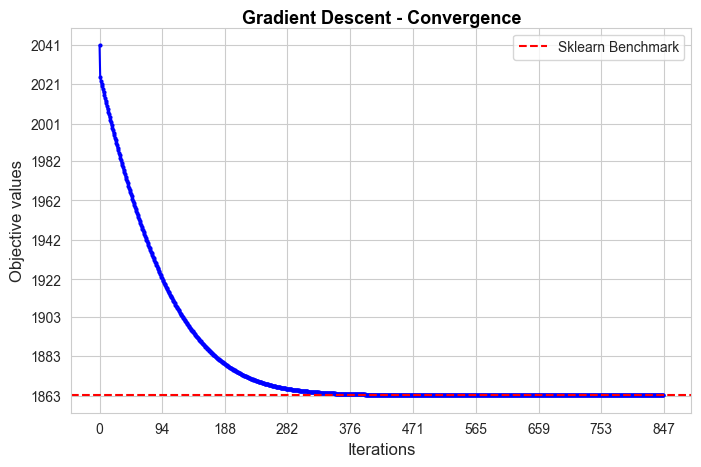

Gradient Descent run time: 9.6
Gradient Descent optimal objective: 1863.15
Gradient Descent iterations: 847
Sklearn run time: 0.04
Sklearn optimal objective: 1863.15
Error (divergence): 0.0


In [239]:
fig, axes = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(y=gradient_descent.objective_values, x=range(0, gradient_descent.break_iter), 
             marker='o', markersize=3, color='blue', markeredgewidth=0)
ax.set_title(f'Objective Function vs Iterations', fontsize=13)
ax.set_xlabel('Iterations', fontsize=12)
ax.set_ylabel('Objective values', fontsize=12)
ax.set_xticks(np.unique(np.round(np.linspace(0, gradient_descent.break_iter, 10))))
ax.set_yticks(np.unique(np.round(np.linspace(np.min(gradient_descent.objective_values), np.max(gradient_descent.objective_values), 10))))
ax.axhline(y=benchmark_results['sklearn']['fun'], color='r', linestyle='--', label='Sklearn Benchmark')
plt.legend()
plt.title('Gradient Descent - Convergence', fontsize=13, y=0.99, weight='bold', color='black', alpha=1)
plt.show()

print('Gradient Descent run time:', np.round(gradient_descent.run_time,2))
print('Gradient Descent optimal objective:', np.round(gradient_descent.objective_optimal,2))
print('Gradient Descent iterations:', gradient_descent.break_iter)
print('Sklearn run time:', np.round(benchmark_results['sklearn']['time'],2))
print('Sklearn optimal objective:', np.round(benchmark_results['sklearn']['fun'],2))
print('Error (divergence):', np.round(gradient_descent.objective_optimal - benchmark_results['sklearn']['fun'], 2))

The convergence of our Gradient Descent implementation is not good in terms of iterations needed to converge, since it needs 847 iterations, what means 9.6 secs to converge, what is too much in comparison with the `sklearn` benchmark (0.04 secs). But, in spite of that, the convergence value is basically the benchmark value (null divergence), so, in terms of approximating the optimal of the objective function is pretty good.

#### **Convergence of Coordinate Descent**

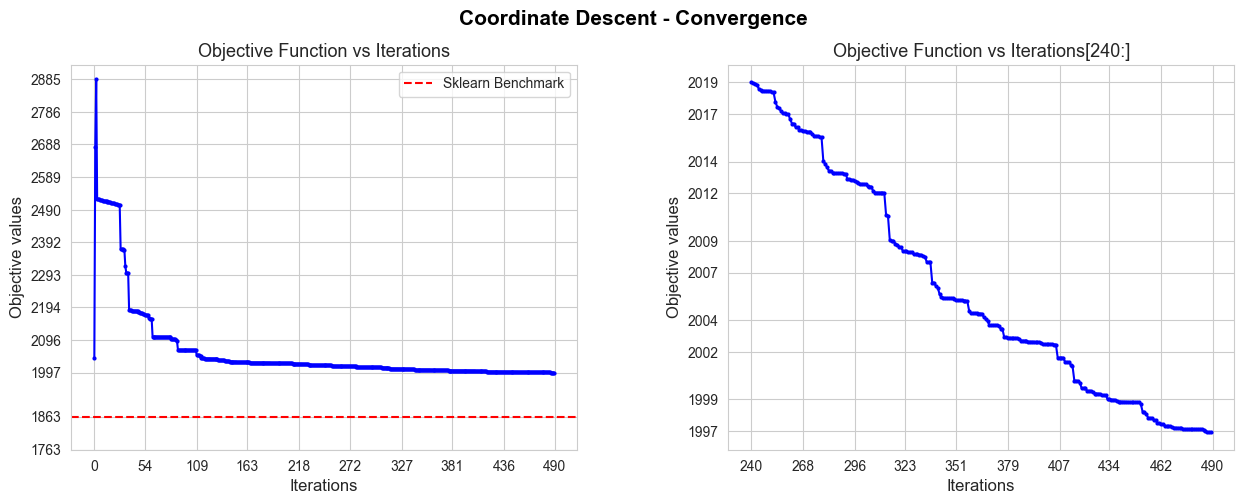

Coordinate Descent run time: 5.55
Coordinate Descent optimal objective: 1996.92
Coordinate Descent iterations: 490
Sklearn run time: 0.04
Sklearn optimal objective: 1863.15
Error (divergence): 133.77


In [236]:
start_iter = 240
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()  
sns.lineplot(y=coordinate_descent.objective_values, 
             x=range(0, coordinate_descent.break_iter), 
             marker='o', markersize=3, color='blue', markeredgewidth=0, ax=axes[0])
sns.lineplot(y=coordinate_descent.objective_values[start_iter:], 
             x=range(start_iter, coordinate_descent.break_iter), 
             marker='o', markersize=3, color='blue', markeredgewidth=0, ax=axes[1])
axes[0].set_title(f'Objective Function vs Iterations', fontsize=13)
axes[1].set_title(f'Objective Function vs Iterations[{start_iter}:]', fontsize=13)
axes[0].set_xlabel('Iterations', fontsize=12)
axes[1].set_xlabel('Iterations', fontsize=12)
axes[0].set_ylabel('Objective values', fontsize=12)
axes[1].set_ylabel('Objective values', fontsize=12)
axes[0].set_xticks(np.unique(np.round(np.linspace(0, coordinate_descent.break_iter, 10))))
axes[1].set_xticks(np.unique(np.round(np.linspace(start_iter, coordinate_descent.break_iter, 10))))
y_ticks_0 = [benchmark_results['sklearn']['fun']-100, benchmark_results['sklearn']['fun']] + list(np.unique(np.round(np.linspace(np.min(coordinate_descent.objective_values), 
                                                                                                                                np.max(coordinate_descent.objective_values), 10))))
axes[0].set_yticks(y_ticks_0)
axes[1].set_yticks(np.unique(np.round(np.linspace(np.min(coordinate_descent.objective_values[start_iter:]), 
                                                  np.max(coordinate_descent.objective_values[start_iter:]), 10))))
axes[0].axhline(y=benchmark_results['sklearn']['fun'], color='r', linestyle='--', label='Sklearn Benchmark')
axes[0].legend()
plt.suptitle('Coordinate Descent - Convergence', fontsize=15, y=0.99, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=1, wspace=0.3) 
plt.show()

print('Coordinate Descent run time:', np.round(coordinate_descent.run_time,2))
print('Coordinate Descent optimal objective:', np.round(coordinate_descent.objective_optimal,2))
print('Coordinate Descent iterations:', coordinate_descent.break_iter)
print('Sklearn run time:', np.round(benchmark_results['sklearn']['time'],2))
print('Sklearn optimal objective:', np.round(benchmark_results['sklearn']['fun'],2))
print('Error (divergence):', np.round(coordinate_descent.objective_optimal - benchmark_results['sklearn']['fun'], 2))

The convergence of our Coordinate Descent implementation is not good in terms of iterations needed to converge, since it needs 490 iterations, what means 5.55 secs to converge, what is too much in comparison with the `sklearn` benchmark (0.04 secs), but less than with Gradient Descent. 

Besides, the convergence value is a bit far from the benchmark value (divergence of 133.77), so, in terms of approximating the optimal of the objective function is not as good as Gradient Descent.

#### **Convergence of Stochastic Gradient Descent**

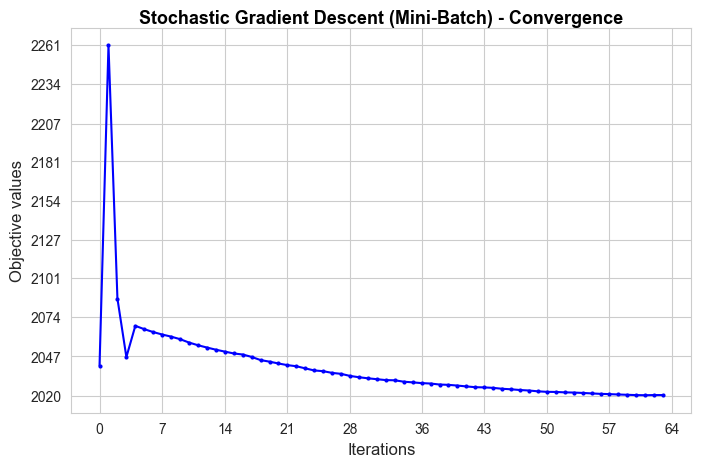

Stochastic Gradient Descent run time: 0.76
Stochastic Descent optimal objective: 2020.49
Sklearn run time: 0.04
Sklearn optimal objective: 1863.15
Error (divergence): 157.34


In [237]:
fig, axes = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(y=stochastic_gradient_descent.objective_values, x=range(0, stochastic_gradient_descent.break_iter), 
             marker='o', markersize=3, color='blue', markeredgewidth=0)
ax.set_title(f'Objective Function vs Iterations', fontsize=13)
ax.set_xlabel('Iterations', fontsize=12)
ax.set_ylabel('Objective values', fontsize=12)
ax.set_xticks(np.unique(np.round(np.linspace(0, stochastic_gradient_descent.break_iter, 10))))
ax.set_yticks(np.unique(np.round(np.linspace(np.min(stochastic_gradient_descent.objective_values), 
                                             np.max(stochastic_gradient_descent.objective_values), 10))))
#ax.axhline(y=benchmark_results['sklearn']['fun'], color='r', linestyle='--', label='Sklearn Benchmark')
plt.title('Stochastic Gradient Descent (Mini-Batch) - Convergence', fontsize=13, y=0.99, weight='bold', color='black', alpha=1)
plt.show()

print('Stochastic Gradient Descent run time:', np.round(stochastic_gradient_descent.run_time,2))
print('Stochastic Descent optimal objective:', np.round(stochastic_gradient_descent.objective_optimal,2))
print('Sklearn run time:', np.round(benchmark_results['sklearn']['time'],2))
print('Sklearn optimal objective:', np.round(benchmark_results['sklearn']['fun'],2))
print('Error (divergence):', np.round(stochastic_gradient_descent.objective_optimal - benchmark_results['sklearn']['fun'], 2))

The convergence of our Stochastic Gradient Descent (Mini-Batch) implementation is very good in terms of iterations needed to converge, since it needs 64 iterations, what means 0.76 secs to converge, what is more than `sklearn` benchmark (0.04 secs), but not much more, and quite less than with the previous methods. 

Besides, the convergence value is a bit far from the benchmark value (divergence of 157.34), so, in terms of approximating the optimal of the objective function is not as good as above methods.

#### **Convergence of Stochastic Gradient Descent with Momentum**

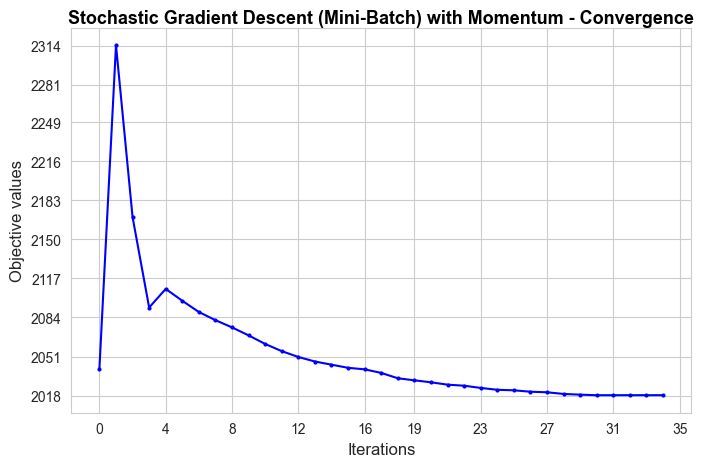

Stochastic Gradient Descent (momentum) run time: 0.42
Stochastic Descent (momentum) optimal objective: 2018.29
Sklearn run time: 0.04
Sklearn optimal objective: 1863.15
Error (divergence): 155.14


In [238]:
fig, axes = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(y=stochastic_gradient_descent_momentum.objective_values, x=range(0, stochastic_gradient_descent_momentum.break_iter), 
             marker='o', markersize=3, color='blue', markeredgewidth=0)
ax.set_title(f'Objective Function vs Iterations', fontsize=13)
ax.set_xlabel('Iterations', fontsize=12)
ax.set_ylabel('Objective values', fontsize=12)
ax.set_xticks(np.unique(np.round(np.linspace(0, stochastic_gradient_descent_momentum.break_iter, 10))))
ax.set_yticks(np.unique(np.round(np.linspace(np.min(stochastic_gradient_descent_momentum.objective_values), 
                                             np.max(stochastic_gradient_descent_momentum.objective_values), 10))))
#ax.axhline(y=benchmark_results['sklearn']['fun'], color='r', linestyle='--', label='Sklearn Benchmark')
plt.title('Stochastic Gradient Descent (Mini-Batch) with Momentum - Convergence', fontsize=13, y=0.99, weight='bold', color='black', alpha=1)
plt.show()

print('Stochastic Gradient Descent (momentum) run time:', np.round(stochastic_gradient_descent_momentum.run_time,2))
print('Stochastic Descent (momentum) optimal objective:', np.round(stochastic_gradient_descent_momentum.objective_optimal,2))
print('Sklearn run time:', np.round(benchmark_results['sklearn']['time'],2))
print('Sklearn optimal objective:', np.round(benchmark_results['sklearn']['fun'],2))
print('Error (divergence):', np.round(stochastic_gradient_descent_momentum.objective_optimal - benchmark_results['sklearn']['fun'], 2))

The convergence of our Stochastic Gradient Descent (Mini-Batch) with momentum implementation is good in terms of iterations needed to converge, since it just needs 35 iterations, what means 0.42 secs to converge, what is more than `sklearn` benchmark (0.04 secs), but not much more, and less than with the previous methods. 

Besides, the convergence value is a bit far from the benchmark value (divergence of 155.14), so, in terms of approximating the optimal of the objective function is better than Stochastic Gradient Descent without momentum.

#### **Convergence of Newton's Method**

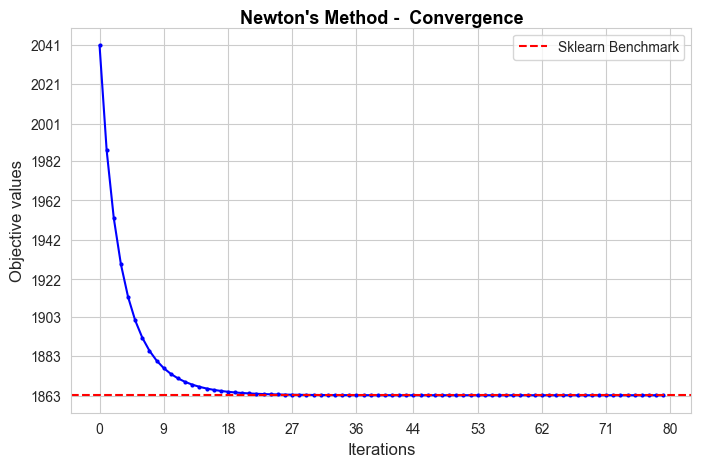

Newton's Method run time: 193.38
Newton's Method optimal objective: 1863.15
Sklearn run time: 0.04
Sklearn optimal objective: 1863.15
Error (divergence): 0.0


In [179]:
fig, axes = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(y=newton.objective_values, x=range(0, newton.break_iter), 
             marker='o', markersize=3, color='blue', markeredgewidth=0)
ax.set_title(f'Objective Function vs Iterations', fontsize=13)
ax.set_xlabel('Iterations', fontsize=12)
ax.set_ylabel('Objective values', fontsize=12)
ax.set_xticks(np.unique(np.round(np.linspace(0, newton.break_iter, 10))))
ax.set_yticks(np.unique(np.round(np.linspace(np.min(newton.objective_values), np.max(newton.objective_values), 10))))
ax.axhline(y=benchmark_results['sklearn']['fun'], color='r', linestyle='--', label='Sklearn Benchmark')
plt.title('Newton\'s Method -  Convergence', fontsize=13, y=0.99, weight='bold', color='black', alpha=1)
plt.legend()
plt.show()

print('Newton\'s Method run time:', np.round(newton.run_time,2))
print('Newton\'s Method optimal objective:', np.round(newton.objective_optimal,2))
print('Sklearn run time:', np.round(benchmark_results['sklearn']['time'],2))
print('Sklearn optimal objective:', np.round(benchmark_results['sklearn']['fun'],2))
print('Error (divergence):', np.round(newton.objective_optimal - benchmark_results['sklearn']['fun'], 2))

The convergence of our Newton's Method implementation is bad in terms of iterations needed to converge, since it needs 80 iterations, what means 193.38 secs to converge, what is much more than `sklearn` benchmark (0.04 secs), and it's by far the most expensive method. 

But, in spite of that, the convergence value is the same of the benchmark value (null divergence), so, in terms of approximating the optimal of the objective function is brilliant.

#### **Convergence of Stochastic Newton's Method**

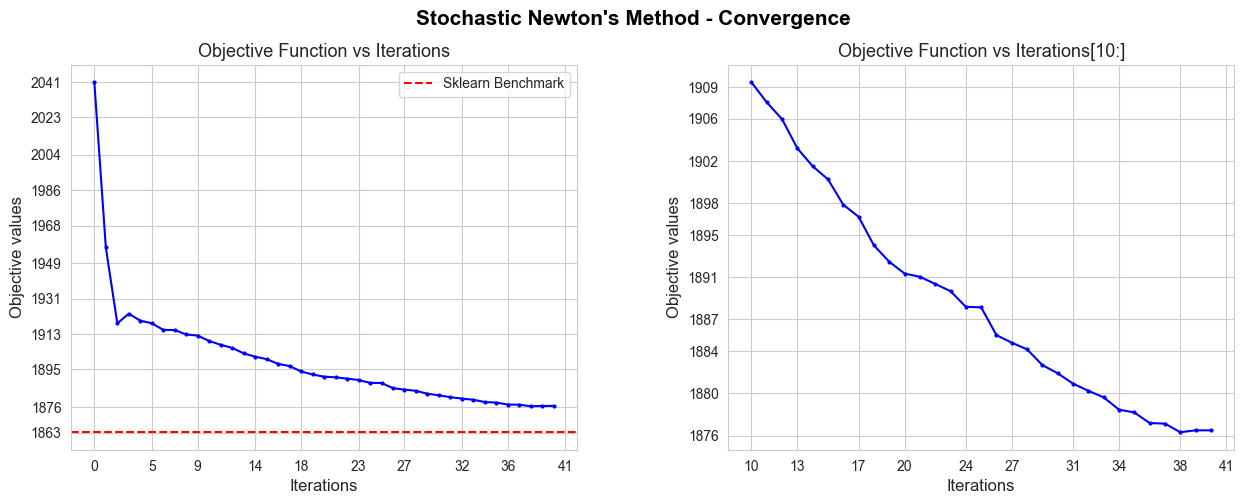

Stochastic Newton's Method run time: 0.84
Stochastic Newton's Method optimal objective: 1876.49
Sklearn run time: 0.04
Sklearn optimal objective: 1863.15
Error (divergence): 13.34


In [242]:
start_iter = 10
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()  
sns.lineplot(y=stochastic_newton.objective_values, 
             x=range(0, stochastic_newton.break_iter), 
             marker='o', markersize=3, color='blue', markeredgewidth=0, ax=axes[0])
sns.lineplot(y=stochastic_newton.objective_values[start_iter:], 
             x=range(start_iter, stochastic_newton.break_iter), 
             marker='o', markersize=3, color='blue', markeredgewidth=0, ax=axes[1])
axes[0].set_title(f'Objective Function vs Iterations', fontsize=13)
axes[1].set_title(f'Objective Function vs Iterations[{start_iter}:]', fontsize=13)
axes[0].set_xlabel('Iterations', fontsize=12)
axes[1].set_xlabel('Iterations', fontsize=12)
axes[0].set_ylabel('Objective values', fontsize=12)
axes[1].set_ylabel('Objective values', fontsize=12)
axes[0].set_xticks(np.unique(np.round(np.linspace(0, stochastic_newton.break_iter, 10))))
axes[1].set_xticks(np.unique(np.round(np.linspace(start_iter, stochastic_newton.break_iter, 10))))
axes[0].axhline(y=benchmark_results['sklearn']['fun'], color='r', linestyle='--', label='Sklearn Benchmark')
axes[0].legend()
y_ticks_0 = [np.round(benchmark_results['sklearn']['fun'])] + list(np.unique(np.round(np.linspace(np.min(stochastic_newton.objective_values), 
                                                                                                  np.max(stochastic_newton.objective_values), 10))))
axes[0].set_yticks(y_ticks_0)
axes[1].set_yticks(np.unique(np.round(np.linspace(np.min(stochastic_newton.objective_values[start_iter:]), 
                                      np.max(stochastic_newton.objective_values[start_iter:]), 10))))
plt.suptitle('Stochastic Newton\'s Method - Convergence', fontsize=15, y=0.99, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=1, wspace=0.3) 
plt.show()

print('Stochastic Newton\'s Method run time:', np.round(stochastic_newton.run_time,2))
print('Stochastic Newton\'s Method optimal objective:', np.round(stochastic_newton.objective_optimal,2))
print('Sklearn run time:', np.round(benchmark_results['sklearn']['time'],2))
print('Sklearn optimal objective:', np.round(benchmark_results['sklearn']['fun'],2))
print('Error (divergence):', np.round(stochastic_newton.objective_optimal - benchmark_results['sklearn']['fun'], 2))

The convergence of our Stochastic Newton's Method implementation is good in terms of iterations needed to converge, since it needs 41 iterations, what means 0.84 secs to converge, what is more than `sklearn` benchmark (0.04 secs), but not much.

In addition, the convergence value is close to the benchmark value (13.34 divergence), so, in terms of approximating the optimal of the objective function is pretty good.

This is so far the best of our Stochastic implementations.

#### **Convergence of Quasi-Newton's BFGS Method**

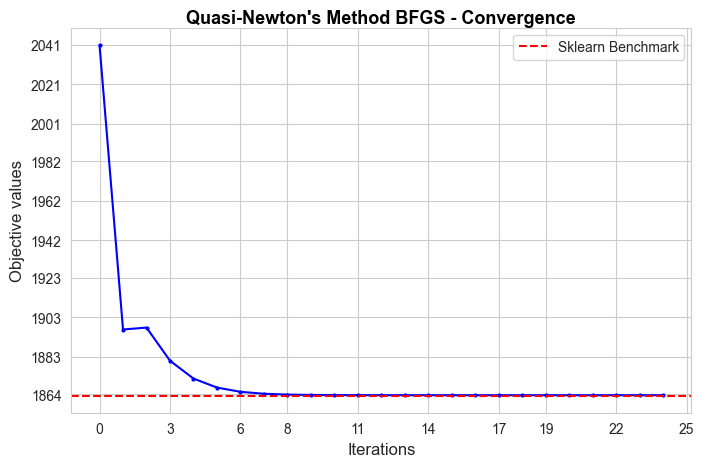

Quasi-Newton's BFGS Method run time: 3.06
Quasi-Newton's BFGS  optimal objective: 1863.51
Sklearn run time: 0.04
Sklearn optimal objective: 1863.15
Error (divergence): 0.36


In [243]:
fig, axes = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(y=quasi_newton_BFGS.objective_values, x=range(0, quasi_newton_BFGS.break_iter), 
             marker='o', markersize=3, color='blue', markeredgewidth=0)
ax.set_title(f'Objective Function vs Iterations', fontsize=13)
ax.set_xlabel('Iterations', fontsize=12)
ax.set_ylabel('Objective values', fontsize=12)
ax.set_xticks(np.unique(np.round(np.linspace(0, quasi_newton_BFGS.break_iter, 10))))
ax.set_yticks(np.unique(np.round(np.linspace(np.min(quasi_newton_BFGS.objective_values), np.max(quasi_newton_BFGS.objective_values), 10))))
ax.axhline(y=benchmark_results['sklearn']['fun'], color='r', linestyle='--', label='Sklearn Benchmark')
plt.title('Quasi-Newton\'s Method BFGS - Convergence', fontsize=13, y=0.99, weight='bold', color='black', alpha=1)
plt.legend()
plt.show()

print('Quasi-Newton\'s BFGS Method run time:', np.round(quasi_newton_BFGS.run_time,2))
print('Quasi-Newton\'s BFGS  optimal objective:', np.round(quasi_newton_BFGS.objective_optimal,2))
print('Sklearn run time:', np.round(benchmark_results['sklearn']['time'],2))
print('Sklearn optimal objective:', np.round(benchmark_results['sklearn']['fun'],2))
print('Error (divergence):', np.round(quasi_newton_BFGS.objective_optimal - benchmark_results['sklearn']['fun'], 2))

The convergence of our Quasi-Newton's BFGS Method implementation is good in terms of iterations needed to converge, since it needs 25 iterations, what means 3.06 secs to converge, what is more than `sklearn` benchmark (0.04 secs), but not too much.

In addition, the convergence value is practically the same of the benchmark value (0.36 divergence), so, in terms of approximating the optimal of the objective function is pretty good.


#### **Convergence of Quasi-Newton's SR1 Method**

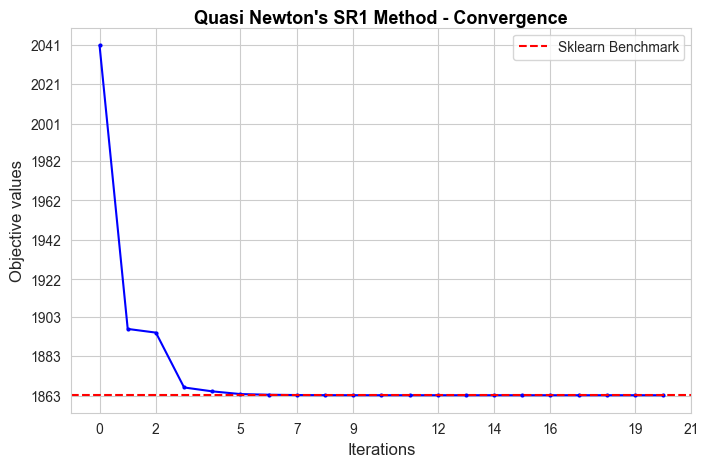

Quasi-Newton's SR1 Method run time: 3.03
Quasi-Newton's SR1  optimal objective: 1863.15
Sklearn run time: 0.04
Sklearn optimal objective: 1863.15
Error (divergence): 0.0


In [244]:
fig, axes = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(y=quasi_newton_SR1.objective_values, x=range(0, quasi_newton_SR1.break_iter), 
             marker='o', markersize=3, color='blue', markeredgewidth=0)
ax.set_title(f'Objective Function vs Iterations', fontsize=13)
ax.set_xlabel('Iterations', fontsize=12)
ax.set_ylabel('Objective values', fontsize=12)
ax.set_xticks(np.unique(np.round(np.linspace(0, quasi_newton_SR1.break_iter, 10))))
ax.set_yticks(np.unique(np.round(np.linspace(np.min(quasi_newton_SR1.objective_values), np.max(quasi_newton_SR1.objective_values), 10))))
ax.axhline(y=benchmark_results['sklearn']['fun'], color='r', linestyle='--', label='Sklearn Benchmark')
plt.title('Quasi Newton\'s SR1 Method - Convergence', fontsize=13, y=0.99, weight='bold', color='black', alpha=1)
plt.legend()
plt.show()

print('Quasi-Newton\'s SR1 Method run time:', np.round(quasi_newton_SR1.run_time,2))
print('Quasi-Newton\'s SR1  optimal objective:', np.round(quasi_newton_SR1.objective_optimal,2))
print('Sklearn run time:', np.round(benchmark_results['sklearn']['time'],2))
print('Sklearn optimal objective:', np.round(benchmark_results['sklearn']['fun'],2))
print('Error (divergence):', np.round(quasi_newton_SR1.objective_optimal - benchmark_results['sklearn']['fun'], 2))

The convergence of our Quasi-Newton's SR1 Method implementation is good in terms of iterations needed to converge, since it needs 25 iterations, what means 3.03 secs to converge, what is more than `sklearn` benchmark (0.04 secs), but not too much.

In addition, the convergence value is the same of the benchmark value (null divergence), so, in terms of approximating the optimal of the objective function is perfect.


#### **Stochastic Convergence of Quasi-Newton's BFGS Method**

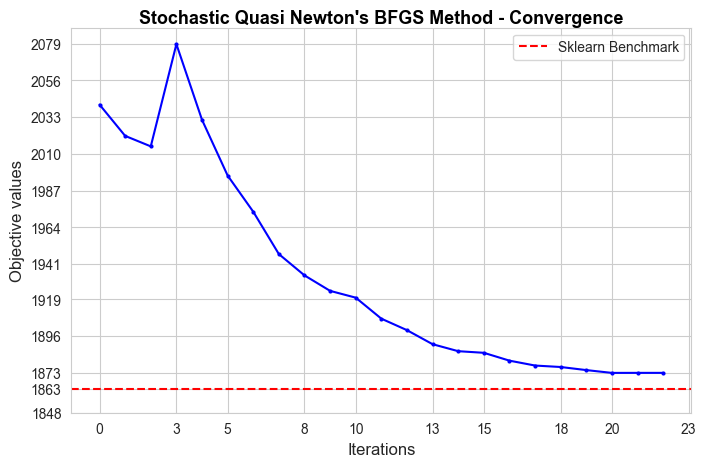

Stochastic Quasi-Newton's BFGS Method run time: 0.54
Stochastic Quasi-Newton's BFGS  optimal objective: 1872.94
Sklearn run time: 0.04
Sklearn optimal objective: 1863.15
Error (divergence): 9.79


In [266]:
fig, axes = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(y=stochastic_quasi_newton_BFGS.objective_values, x=range(0, stochastic_quasi_newton_BFGS.break_iter), 
             marker='o', markersize=3, color='blue', markeredgewidth=0)
ax.set_title(f'Objective Function vs Iterations', fontsize=13)
ax.set_xlabel('Iterations', fontsize=12)
ax.set_ylabel('Objective values', fontsize=12)
ax.set_xticks(np.unique(np.round(np.linspace(0, stochastic_quasi_newton_BFGS.break_iter, 10))))
ax.set_yticks([np.round(benchmark_results['sklearn']['fun'])-15, np.round(benchmark_results['sklearn']['fun'])] + list(np.unique(np.round(np.linspace(np.min(stochastic_quasi_newton_BFGS.objective_values), 
                                                                                                    np.max(stochastic_quasi_newton_BFGS.objective_values), 10)))))
ax.axhline(y=benchmark_results['sklearn']['fun'], color='r', linestyle='--', label='Sklearn Benchmark')
plt.title('Stochastic Quasi Newton\'s BFGS Method - Convergence', fontsize=13, y=0.99, weight='bold', color='black', alpha=1)
plt.legend()
plt.show()

print('Stochastic Quasi-Newton\'s BFGS Method run time:', np.round(stochastic_quasi_newton_BFGS.run_time,2))
print('Stochastic Quasi-Newton\'s BFGS  optimal objective:', np.round(stochastic_quasi_newton_BFGS.objective_optimal,2))
print('Sklearn run time:', np.round(benchmark_results['sklearn']['time'],2))
print('Sklearn optimal objective:', np.round(benchmark_results['sklearn']['fun'],2))
print('Error (divergence):', np.round(stochastic_quasi_newton_BFGS.objective_optimal - benchmark_results['sklearn']['fun'], 2))

The convergence of our Stochastic Quasi-Newton's BFGS Method implementation is pretty good in terms of iterations needed to converge, since it needs 23 iterations, what means 0.54 secs to converge, what is more than `sklearn` benchmark (0.04 secs), but not much.

In addition, the convergence value is the close to the benchmark value (9.79 divergence), so, in terms of approximating the optimal of the objective function is good.


#### **Stochastic Convergence of Quasi-Newton's SR1 Method**

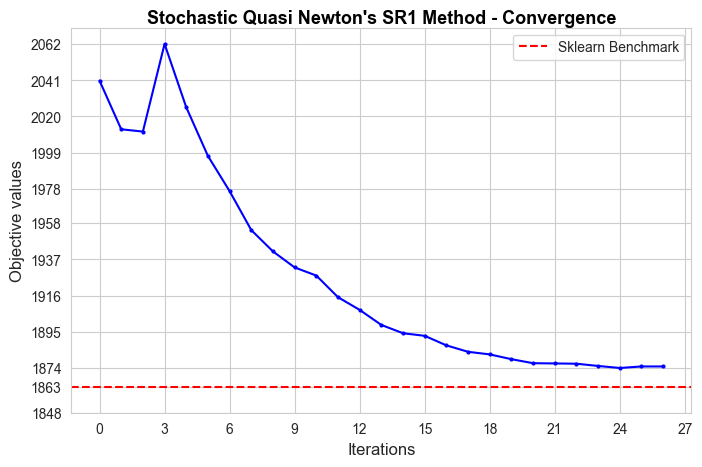

Stochastic Quasi-Newton's SR1 Method run time: 0.34
Stochastic Quasi-Newton's SR1  optimal objective: 1874.85
Sklearn run time: 0.04
Sklearn optimal objective: 1863.15
Error (divergence): 11.71


In [267]:
fig, axes = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(y=stochastic_quasi_newton_SR1.objective_values, x=range(0, stochastic_quasi_newton_SR1.break_iter), 
             marker='o', markersize=3, color='blue', markeredgewidth=0)
ax.set_title(f'Objective Function vs Iterations', fontsize=13)
ax.set_xlabel('Iterations', fontsize=12)
ax.set_ylabel('Objective values', fontsize=12)
ax.set_xticks(np.unique(np.round(np.linspace(0, stochastic_quasi_newton_SR1.break_iter, 10))))
ax.set_yticks([np.round(benchmark_results['sklearn']['fun'])-15, np.round(benchmark_results['sklearn']['fun'])] + list(np.unique(np.round(np.linspace(np.min(stochastic_quasi_newton_SR1.objective_values), 
                                                                                                    np.max(stochastic_quasi_newton_SR1.objective_values), 10)))))
ax.axhline(y=benchmark_results['sklearn']['fun'], color='r', linestyle='--', label='Sklearn Benchmark')
plt.title('Stochastic Quasi Newton\'s SR1 Method - Convergence', fontsize=13, y=0.99, weight='bold', color='black', alpha=1)
plt.legend()
plt.show()

print('Stochastic Quasi-Newton\'s SR1 Method run time:', np.round(stochastic_quasi_newton_SR1.run_time,2))
print('Stochastic Quasi-Newton\'s SR1  optimal objective:', np.round(stochastic_quasi_newton_SR1.objective_optimal,2))
print('Sklearn run time:', np.round(benchmark_results['sklearn']['time'],2))
print('Sklearn optimal objective:', np.round(benchmark_results['sklearn']['fun'],2))
print('Error (divergence):', np.round(stochastic_quasi_newton_SR1.objective_optimal - benchmark_results['sklearn']['fun'], 2))

The convergence of our Stochastic Quasi-Newton's SR1 Method implementation is pretty good in terms of iterations needed to converge, since it needs 16 iterations, what means 0.34 secs to converge, what is more than `sklearn` benchmark (0.04 secs), but a bit less than with BFGS rule.

In addition, the convergence value is the close to the benchmark value (11.71 divergence), so, in terms of approximating the optimal of the objective function is good but a bit more than with the BFGS rule.


### **Methods Comparison: Optimal values vs Times**

In this section we are going to compare all the tested methods (both our implementations and the `sklearn` and `scipy` ones) in terms of optimality and time.

In [288]:
methods = {}
methods['gradient_descent'] = gradient_descent
methods['coordinate_descent'] = coordinate_descent
methods['stochastic_gradient_descent'] = stochastic_gradient_descent
methods['stochastic_gradient_descent_momentum'] = stochastic_gradient_descent_momentum
methods['newton'] = newton
methods['stochastic_newton'] = stochastic_newton
methods['quasi_newton_BFGS'] = quasi_newton_BFGS
methods['quasi_newton_SR1'] = quasi_newton_SR1
methods['stochastic_quasi_newton_BFGS'] = stochastic_quasi_newton_BFGS
methods['stochastic_quasi_newton_SR1'] = stochastic_quasi_newton_SR1

methods_list = [x for x in methods.keys()]
optimal_values_methods = [methods[x].objective_optimal for x in methods_list]
times_methods = [methods[x].run_time for x in methods_list]

for method in benchmark_methods:
    methods_list.append(method)
    optimal_values_methods.append(benchmark_results[method]['fun'])
    times_methods.append(benchmark_results[method]['time'])

best_method_objective = methods_list[np.argsort(optimal_values_methods)[0]]
best_objective = np.min(optimal_values_methods)
best_method_time = methods_list[np.argsort(times_methods)[0]]
best_time = np.min(times_methods)
optimal_values_methods = np.array(optimal_values_methods)
times_methods = np.array(times_methods)
error_to_best = np.round(optimal_values_methods - best_objective,2)
time_to_best = np.round(times_methods - best_time,2)
comparison_table = pd.DataFrame({'Method': methods_list, 'Optimality': optimal_values_methods, 'Error': error_to_best, 
                                 'Time': times_methods, 'Time_to_best': time_to_best})

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(times_methods.reshape(-1,1))
times_methods_scaled = scaler.transform(times_methods.reshape(-1,1)).flatten()
scaler.fit(optimal_values_methods.reshape(-1,1))
optimal_values_methods_scaled = scaler.transform(optimal_values_methods.reshape(-1,1)).flatten()
best_method_objective_scaled = methods_list[np.argsort(optimal_values_methods_scaled)[0]]
best_objective_scaled = np.min(optimal_values_methods_scaled)
best_method_time_scaled = methods_list[np.argsort(times_methods_scaled)[0]]
best_time_scaled = np.min(times_methods_scaled)

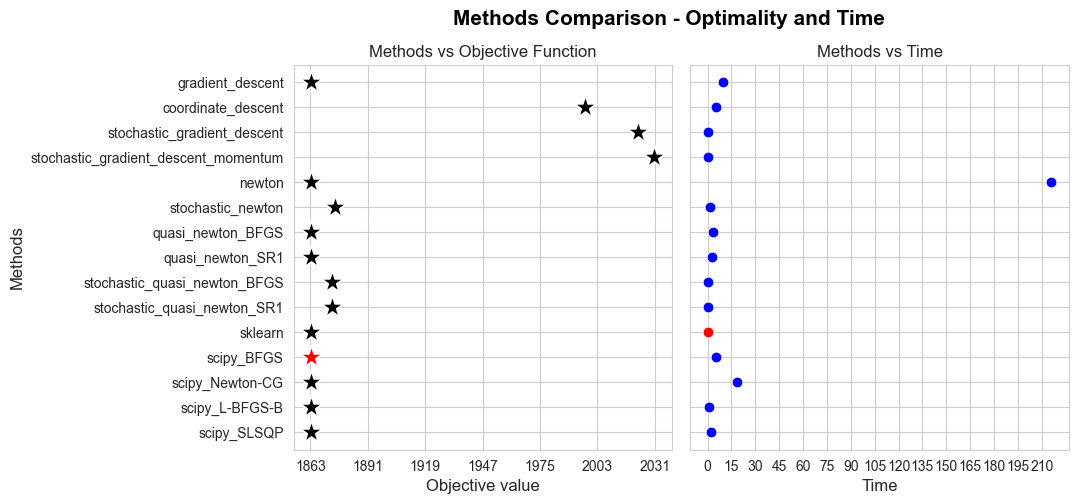

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()  

sns.scatterplot(x=optimal_values_methods, y=methods_list, marker='*', color='black', s=300, ax=axes[0])
sns.scatterplot(x=[best_objective], y=[best_method_objective], marker='*', color='red', s=300, ax=axes[0])

sns.scatterplot(x=times_methods, y=methods_list, color='blue', s=60, ax=axes[1])
sns.scatterplot(x=[best_time], y=[best_method_time], color='red', s=60, ax=axes[1])

axes[0].set_title(f'Methods vs Objective Function', fontsize=12)
axes[1].set_title(f'Methods vs Time', fontsize=12)
axes[0].set_xlabel('Objective value', fontsize=12)
axes[1].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Methods', fontsize=12)
axes[1].yaxis.set_ticklabels([])
#axes[1].set_ylabel('Objective values', fontsize=12)
axes[0].set_xticks(np.round(np.linspace(np.min(optimal_values_methods), np.max(optimal_values_methods), 7)))
axes[1].set_xticks(np.arange(0, np.max(times_methods)+5, 15))
plt.suptitle('Methods Comparison - Optimality and Time', fontsize=15, y=0.99, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=1, wspace=0.05) 
plt.show()

In order to make a more fruitful comparison we are going to scale the objective and time values, to bring them to the same scale and make them comparable.

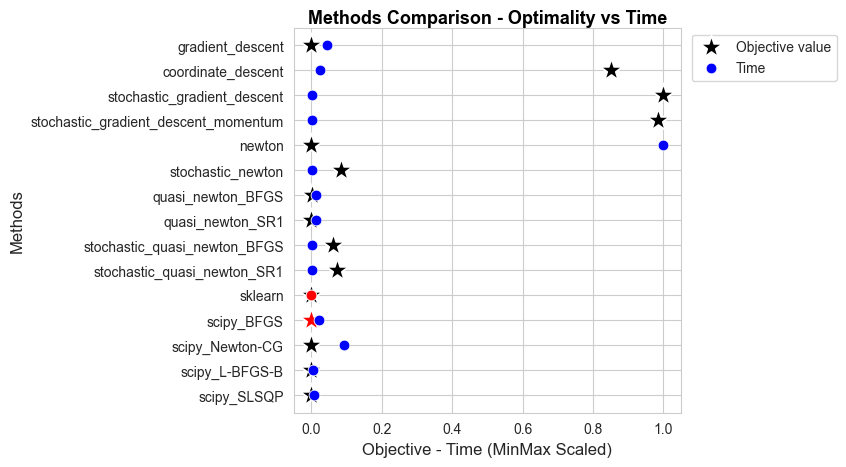

In [276]:
fig, axes = plt.subplots(figsize=(5, 5))

ax=sns.scatterplot(x=optimal_values_methods_scaled, y=methods_list,
                marker='*', color='black', s=300, label='Objective value')
ax=sns.scatterplot(x=[best_objective_scaled], y=[best_method_objective_scaled], 
                marker='*', color='red', s=300)

ax=sns.scatterplot(x=times_methods_scaled, y=methods_list, 
                marker='o', color='blue', s=60, label='Time')
ax=sns.scatterplot(x=[best_time_scaled], y=[best_method_time_scaled], 
                marker='o', color='red', s=60)
plt.title('Methods Comparison - Optimality vs Time', fontsize=13, y=0.99, weight='bold', color='black', alpha=1)
ax.set_xlabel('Objective - Time (MinMax Scaled)', fontsize=12)
ax.set_ylabel('Methods', fontsize=12)
plt.legend(loc="upper right", bbox_to_anchor=(1.42, 1.0))
plt.show()

print('Stochastic Quasi-Newton\'s BFGS Method time:', np.round(stochastic_quasi_newton_BFGS.run_time,2))
print('Stochastic Quasi-Newton\'s BFGS  optimal objective:', np.round(stochastic_quasi_newton_BFGS.objective_optimal,2))
print('Sklearn time:', np.round(benchmark_results['sklearn']['time'],2))
print('Sklearn optimal objective:', np.round(benchmark_results['sklearn']['fun'],2))

In [290]:
comparison_table.sort_values(by='Error')

,Method,Optimality,Error,Time,Time_to_best
0,gradient_descent,1863.146834,0.00,9.599391,9.56
4,newton,1863.146789,0.00,209.193209,209.15
7,quasi_newton_SR1,1863.148509,0.00,3.032212,2.99
10,sklearn,1863.146785,0.00,0.044000,0.00
11,scipy_BFGS,1863.146785,0.00,4.999240,4.96
12,scipy_Newton-CG,1863.146785,0.00,19.659599,19.62
13,scipy_L-BFGS-B,1863.146785,0.00,0.983402,0.94
14,scipy_SLSQP,1863.146796,0.00,1.614245,1.57
6,quasi_newton_BFGS,1863.508551,0.36,3.060085,3.02
8,stochastic_quasi_newton_BFGS,1872.936608,9.79,0.536080,0.49


In [291]:
comparison_table.sort_values(by='Time')

,Method,Optimality,Error,Time,Time_to_best
10,sklearn,1863.146785,0.00,0.044000,0.00
9,stochastic_quasi_newton_SR1,1874.854659,11.71,0.341867,0.30
3,stochastic_gradient_descent_momentum,2018.289185,155.14,0.416592,0.37
8,stochastic_quasi_newton_BFGS,1872.936608,9.79,0.536080,0.49
2,stochastic_gradient_descent,2020.486231,157.34,0.758967,0.71
5,stochastic_newton,1876.491136,13.34,0.837814,0.79
13,scipy_L-BFGS-B,1863.146785,0.00,0.983402,0.94
14,scipy_SLSQP,1863.146796,0.00,1.614245,1.57
7,quasi_newton_SR1,1863.148509,0.00,3.032212,2.99
6,quasi_newton_BFGS,1863.508551,0.36,3.060085,3.02


Some relevant conclusions that we can extract from the above table and plots:

- The best methods in terms of optimality are: the `sklearn` and `scipy` implementations and our Gradient Descent, Newton and Quasi-Newton SR1 implementations.

- The best methods in terms of time are: `sklearn` is th best, followed by our implementation of Stochastic Quasi-Newton SR1, Stochastic Gradient Descent with momentum and Stochastic Quasi-Newton BFGS.

- The best method in terms of trade-off between optimality and time are: `sklearn` solver, `scipy` implementation of Quasi-Newton's L-BFGS-B and SLSQP, followed by our implementations of Quasi-Newton's BFGS and SR1, and later our Gradient Descent and Stochastic Newton. 

    - Among our implementations the best is Quasi-Newton's BFGS and SR1
    - Among our stochastic implementations the best is Stochastic Quasi-Newton's BFGS Method.

### **Analysis of the sample size effect in some of the stochastic methods**

In this section we are going to explore the effect of the sample size in the stochastic methods (or at least in some of them).

#### **Stochastic Gradient Descent**

In [292]:
sample_size_grid = np.arange(50, 10000, 100)
param_grid = {'sample_size': sample_size_grid}

stochastic_gradient_descent = stochastic_gradient_descent_method(objective=minus_logL, gradient=gradient_function, x_0=initial_betas, 
                                                                 n_iter=2000, tol=1e-6, seed=123, momentum=False)
stochastic_gradient_descent.set_params(**stochastic_gradient_descent_best_params)
random_search = RandomSearch(estimator=stochastic_gradient_descent, param_grid=param_grid, n_trials=len(sample_size_grid), seed=123)
random_search.fit(args=(X,Y))
sgd_sample_size_results = random_search.results

In [293]:
sgd_sample_size_results.head(5)

,sample_size,objective_value,time
22,9750,2016.575250,1.924896
77,9650,2016.707930,1.968579
60,9550,2016.948602,2.532017
12,9950,2017.999126,0.991965
4,9850,2018.105974,0.876709


In [294]:
sgd_sample_size_results.tail(5)

,sample_size,objective_value,time
2,1150,2071.985893,0.330054
72,1550,2074.434644,0.638791
33,1650,2079.663950,1.353488
79,1250,2082.915842,0.802284
5,1350,2085.161451,0.539797


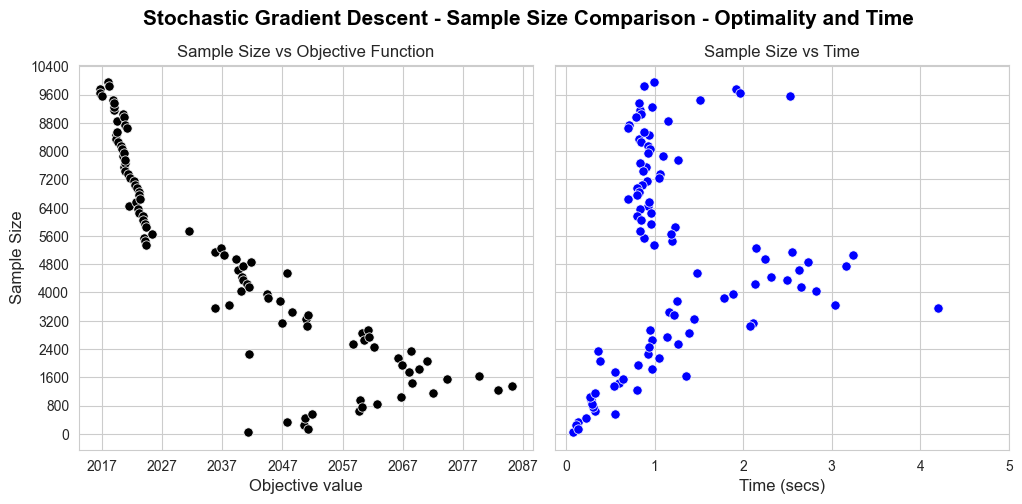

In [308]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()  

sns.scatterplot(x=sgd_sample_size_results['objective_value'], y=sgd_sample_size_results['sample_size'], 
                marker='o', color='black', s=45, ax=axes[0])
sns.scatterplot(x=sgd_sample_size_results['time'], y=sgd_sample_size_results['sample_size'],
                 color='blue', s=45, ax=axes[1])

axes[0].set_title(f'Sample Size vs Objective Function', fontsize=12)
axes[1].set_title(f'Sample Size vs Time', fontsize=12)
axes[0].set_xlabel('Objective value', fontsize=12)
axes[1].set_xlabel('Time (secs)', fontsize=12)
axes[0].set_ylabel('Sample Size', fontsize=12)
axes[1].yaxis.set_ticklabels([])
axes[1].set_ylabel(' ', fontsize=12)
#axes[0].set_xticks(np.round(np.linspace(np.min(sgd_sample_size_results['objective_value']), np.max(sgd_sample_size_results['objective_value']), 7)))
axes[0].set_yticks(np.arange(0, np.max(sgd_sample_size_results['sample_size'])+1000, 800))
axes[0].set_xticks(np.round(np.arange(np.min(sgd_sample_size_results['objective_value']), 
                             np.max(sgd_sample_size_results['objective_value'])+5, 10)))
axes[1].set_yticks(np.arange(0, np.max(sgd_sample_size_results['sample_size'])+1000, 800))
axes[1].set_xticks(np.arange(0, np.max(sgd_sample_size_results['time']+1), 1))
plt.suptitle('Stochastic Gradient Descent - Sample Size Comparison - Optimality and Time', 
             fontsize=15, y=0.99, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=1, wspace=0.05) 
plt.show()

Some conclusion that can be obtained from the plot:

- It seems to be a negative relation between the sample size and the objective value. In general, if a greater sample sized is used to estimate the gradient, a better (lower in this case) objective value is found. But there are some small sample sizes (50-800) that work much better than other larger (1000-3000).

- It seems to be a positive relation between the sample size and the computational time, but only for not large enough samples (50-5500). For large enough (5500-10000) the computational time is quite similar (has low variance) and is in average lower than the one of some smaller samples (3200-5000).

#### **Stochastic Newton's Method**

In [309]:
sn_sample_size_objective_values = []
sn_sample_size_times = []
grad_sample_size_grid = [500, 500, 700, 1000, 1000, 1500, 2000, 2000, 2500, 3000, 4000, 5000, 6000, 3000, 5000, 5000, 6000, 8000]
hess_sample_size_grid = [300, 500, 500, 500,  700, 700, 700, 1000, 1000, 1000, 1000, 1000, 1000, 2000, 2000, 3000, 3000, 5000]

for x,y in zip(grad_sample_size_grid, hess_sample_size_grid):

    stochastic_newton = Stochastic_Newton_method(objective=minus_logL, gradient=gradient_function, hessian=hessian_function, 
                                             x_0=initial_betas, n_iter=2000, tol=1e-6, seed=123, 
                                             grad_sample_size=x, hess_sample_size=y)
    stochastic_newton.set_params(**stochastic_newton_best_params)
    stochastic_newton.fit(args=(X,Y))
    sn_sample_size_objective_values.append(stochastic_newton.objective_optimal)
    sn_sample_size_times.append(stochastic_newton.run_time)

sample_sizes = list(zip(grad_sample_size_grid, hess_sample_size_grid))
sample_sizes = [str(x) for x in sample_sizes]

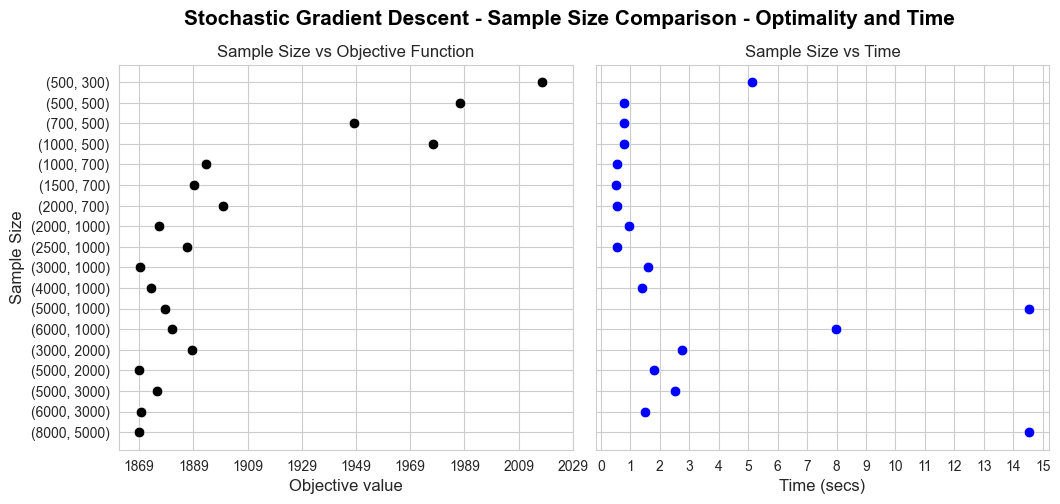

In [310]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()  

sns.scatterplot(x=sn_sample_size_objective_values, y=sample_sizes, 
                marker='o', color='black', s=60, ax=axes[0])
sns.scatterplot(x=sn_sample_size_times, y=sample_sizes,
                 color='blue', s=60, ax=axes[1])

axes[0].set_title(f'Sample Size vs Objective Function', fontsize=12)
axes[1].set_title(f'Sample Size vs Time', fontsize=12)
axes[0].set_xlabel('Objective value', fontsize=12)
axes[1].set_xlabel('Time (secs)', fontsize=12)
axes[0].set_ylabel('Sample Size', fontsize=12)
axes[1].yaxis.set_ticklabels([])
axes[1].set_ylabel(' ', fontsize=12)
#axes[0].set_xticks(np.round(np.linspace(np.min(sgd_sample_size_results['objective_value']), np.max(sgd_sample_size_results['objective_value']), 7)))
#axes[0].set_yticks(np.arange(0, np.max(sgd_sample_size_results['sample_size'])+1000, 1000))
axes[0].set_xticks(np.round(np.arange(np.min(sn_sample_size_objective_values), 
                             np.max(sn_sample_size_objective_values)+20, 20)))
axes[1].set_xticks(np.arange(0, np.max(sn_sample_size_times)+1, 1))
plt.suptitle('Stochastic Gradient Descent - Sample Size Comparison - Optimality and Time', 
             fontsize=15, y=0.99, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=1, wspace=0.05) 
plt.show()

Some conclusions from the plot:

- When the combination of sample sizes used to estimated the gradient and the hessian, respectively, is large, the objective value is better (lower in this case).

- There seem not to be a clear pattern that govern the relationship between this pairs of sample sizes and the computational time.

## **Optimizing Penalized Logistic Regression**

In this section we are going to address penalized logistic regression, which is a variant of logistic regression that penalized the betas, enforcing them to fulfill some constraint.

The classic (Ridge) constraint is $|| \beta ||_2^2 = \sum_{j=0}^p \beta_j^2 = 0$ and the idea is to bring some of the coefficient (betas) to zero, in order to add a sort of automatic feature selection to the model. 

This is a popular idea in modern statistical learning. Ridge, Lasso and Elastic Net Regression are the greatest exponents of this technique, but it has been exported to other models, like Logistic Regression.

The problem to solve in this section is the following **constrained** problem:

$$\widehat{\beta} \hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta}{Max} \hspace{0.1cm} log(\mathcal{L}(\beta)) \\[0.3cm]
s.t.: \hspace{0.15cm}\small{\sum_{j=0}^p \beta_j^2 = 100}$$

Which can be expressed as an **unconstrained** problem as follows:


$$\widehat{\beta} \hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta}{Min} \hspace{0.1cm} - \Big[\hspace{0.08cm} log(\mathcal{L}(\beta)) - \lambda\cdot \small{\Big(\sum_{j=0}^p \beta_j^2 -100\Big)^2} \hspace{0.08cm}\Big]$$

Applying the conversion to Min problem and the matrix form, we have the following equivalent problem:

$$\widehat{\beta} \hspace{0.1cm} = \hspace{0.1cm} arg \hspace{0.1cm} \underset{\beta}{Min} \hspace{0.1cm} -\Big[\hspace{0.05cm}   Y \cdot log(P_1) + (1-Y)\cdot log(1-P_1) \hspace{0.05cm} - \lambda\cdot (\beta^2 - 100)^2\Big]$$

The **gradient** of $f(\beta)$ is:


$$\nabla f(\beta) \hspace{0.06cm} = \hspace{0.06cm}   X^\prime \cdot (P_1-Y) + 2\lambda\cdot (\beta^2 - 100)\cdot 2\beta$$



The **hessian** of $f(\beta) = - log(\mathcal{L}(\beta))$ is:


$$\nabla^2 f(\beta) \hspace{0.06cm} = \hspace{0.06cm}   X^\prime \cdot D \cdot X + 2\lambda \cdot 2 I_p$$

where:

$$D= diag(P_1\cdot (1-P_1))$$

### **Initial elements**

As we did before, we define the initial elements to address the problem computationally.

In [313]:
def minus_logL_penalized(betas, *args):
    X, Y, pen_lambda = args
    epsilon = 1e-15
    p1 = logistic(X @ betas) 
    sum1 = Y @ np.log(p1 + epsilon)
    sum2 = (1-Y)  @ np.log(1-p1 + epsilon)
    penalization = pen_lambda*(np.sum(betas**2) - 100)**2
    result = - (sum1 + sum2 - penalization)
    return result

def gradient_function_penalized(betas, *args):
    X, Y, pen_lambda = args
    p1 = logistic(X @ betas) 
    gradient = X.T @ (p1 - Y) + 2*pen_lambda*(np.sum(betas**2) - 100)*(2*betas)
    return gradient

def hessian_function_penalized(betas, *args):
    X, Y, pen_lambda = args
    p = X.shape[1]
    p1 = logistic(X @ betas) 
    D = np.diag(p1 * (1 - p1))
    hessian = X.T @ D @ X + (2*pen_lambda)*2*np.identity(p)
    return hessian

pen_lambda = 1 # in (0.7, 2) is enough.

### `Sklearn` and `Scipy` optimization

As before, we will first solve the problem with `Scipy` solvers.

In [314]:
benchmark_results = {}
benchmark_methods = ['scipy_BFGS', 'scipy_Newton-CG', 'scipy_L-BFGS-B', 'scipy_SLSQP']

# BFGS := Broyden–Fletcher–Goldfarb–Shanno algorithm
# Newton-CG := Newton Conjugate Gradient algorithm
# L-BFGS-B := Limited memory BFGS
# SLSQP := Sequential Least Squares Programming 

for method in benchmark_methods:

    start_time = time.time()
    if method == 'scipy_Newton-CG':
        benchmark_results[method] = minimize(fun=minus_logL_penalized, x0=initial_betas, method=method.split('_')[1], 
                                             jac=gradient_function_penalized, hess=hessian_function_penalized, args=(X,Y,pen_lambda))

    else:
        benchmark_results[method] = minimize(fun=minus_logL_penalized, x0=initial_betas, method=method.split('_')[1], args=(X,Y, pen_lambda))
    end_time = time.time()
    benchmark_results[method]['time'] = end_time - start_time

# Time: 

In [315]:
benchmark_results['scipy_BFGS']

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2384.0578128540274
        x: [ 2.541e+00  2.550e+00 ...  6.324e-01  9.169e-01]
      nit: 56
      jac: [ 9.155e-05  9.155e-05 ... -3.052e-05  6.104e-05]
 hess_inv: [[ 7.753e-04  7.914e-05 ...  7.503e-05  1.077e-04]
            [ 7.914e-05  6.824e-04 ...  5.427e-05  1.858e-05]
            ...
            [ 7.503e-05  5.427e-05 ...  6.907e-04  3.014e-05]
            [ 1.077e-04  1.858e-05 ...  3.014e-05  7.279e-04]]
     nfev: 3493
     njev: 129
     time: 8.339475631713867

In [316]:
benchmark_results['scipy_Newton-CG']

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2384.0578133289528
       x: [ 2.541e+00  2.550e+00 ...  6.324e-01  9.168e-01]
     nit: 9
     jac: [ 4.150e-02 -3.019e-02 ... -2.178e-02 -3.583e-03]
    nfev: 16
    njev: 16
    nhev: 9
    time: 32.1147027015686

In [317]:
benchmark_results['scipy_L-BFGS-B']

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 2384.0578128542115
        x: [ 2.541e+00  2.550e+00 ...  6.324e-01  9.169e-01]
      nit: 11
      jac: [ 1.364e-04  1.364e-04 ...  0.000e+00  3.183e-04]
     nfev: 351
     njev: 13
 hess_inv: <26x26 LbfgsInvHessProduct with dtype=float64>
     time: 1.153794765472412

In [318]:
benchmark_results['scipy_SLSQP']

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2384.057813545238
       x: [ 2.541e+00  2.550e+00 ...  6.324e-01  9.169e-01]
     nit: 25
     jac: [-1.343e-03 -5.524e-03 ...  6.500e-03  1.306e-02]
    nfev: 737
    njev: 25
    time: 1.7633354663848877

We can check easily if the constraint is fulfilled:

In [319]:
np.sum(benchmark_results['scipy_BFGS'].x**2)

103.45900689903829

In [320]:
np.sum(benchmark_results['scipy_Newton-CG'].x**2)

103.45907721935968

In [321]:
np.sum(benchmark_results['scipy_L-BFGS-B'].x**2)

103.45900666588769

In [322]:
np.sum(benchmark_results['scipy_SLSQP'].x**2)

103.45905741002673

We can see that with $\lambda =1$ constraint not totally satisfy, but is close to it.

### **HPO**

In this section we are going to solve the new problem only with one of our implemented methods, for the shake of brevity.

The chosen method is the Stochastic Quasi-Newton BFGS Method, which was the best among our Stochastic implementations in the previous section.

In [483]:
pen_lambda = 1
learning_rate_grid = np.logspace(-4, -3, num=55)
phi_grid = np.arange(0.1, 1, 0.01)
#sigma_grid = np.logspace(-2, -1, num=50)
param_grid = {'learning_rate': learning_rate_grid, 'phi': phi_grid}

stochastic_quasi_newton_BFGS = Stochastic_Quasi_Newton_method(objective=minus_logL_penalized, gradient=gradient_function_penalized, hessian=hessian_function_penalized, 
                                                              x_0=initial_betas, n_iter=2000, tol=1e-6, grad_sample_size=2000, hess_sample_size=1000, seed=123, rule='BFGS')

random_search = RandomSearch(estimator=stochastic_quasi_newton_BFGS, param_grid=param_grid, n_trials=50, seed=123)
random_search.fit(args=(X,Y, pen_lambda))
stochastic_quasi_newton_BFGS_penalized_best_params = random_search.best_params_
stochastic_quasi_newton_BFGS_penalized_results = random_search.results

C:\Users\fscielzo\AppData\Local\Temp\ipykernel_4396\3752159407.py:74: RuntimeWarning: invalid value encountered in scalar divide
  B[k+1] = B[k] - (M1 @ M1.T)/M2 + M3/M4


In [484]:
stochastic_quasi_newton_BFGS_penalized_results.head(10)

,learning_rate,phi,objective_value,time
8,0.000774,0.82,2414.395541,3.294048
44,0.000742,0.53,2435.829487,0.134308
47,0.000742,0.97,2437.416647,0.796468
38,0.000626,0.46,2453.170528,0.567720
45,0.000626,0.96,2453.426843,0.834335
40,0.000599,0.74,2471.449251,0.648206
48,0.000880,0.46,2474.771527,6.856022
9,0.000880,0.26,2474.771527,3.889722
16,0.000880,0.15,2474.771527,4.042038
37,0.000918,0.27,2513.489051,4.228621


The penalty seems to affect the calculation time, increasing it.

In [485]:
stochastic_quasi_newton_BFGS_penalized_results['time'].mean()

1.899277400970459

In [486]:
stochastic_quasi_newton_BFGS_results['time'].mean()

2.3946699798107147

We fit the method with the best parameters find during the HPO phase.

In [487]:
stochastic_quasi_newton_BFGS_penalized = Stochastic_Quasi_Newton_method(objective=minus_logL_penalized, gradient=gradient_function_penalized, hessian=hessian_function_penalized, 
                                                   x_0=initial_betas, n_iter=2000, tol=1e-6, grad_sample_size=2000, hess_sample_size=1000, seed=123, rule='BFGS')
stochastic_quasi_newton_BFGS_penalized.set_params(**stochastic_quasi_newton_BFGS_penalized_best_params)
stochastic_quasi_newton_BFGS_penalized.fit(args=(X,Y, pen_lambda))

In [488]:
stochastic_quasi_newton_BFGS_penalized.objective_optimal

2414.3955411016636

In [489]:
stochastic_quasi_newton_BFGS_penalized.x_optimal

array([ 2.49175735,  2.48437229,  2.47435553, -0.02026137, -2.56829027,
       -1.23482926, -2.83378562,  1.23127567, -3.08038169,  2.84108034,
        2.18704128,  1.53785186,  0.32576063, -1.55905894,  0.5476085 ,
        0.57765483, -0.29964037, -3.0904155 ,  1.56870018, -2.21738445,
       -3.12750058,  2.17646045,  1.83412108, -0.33615271,  0.63636938,
        0.87384157])

In [490]:
stochastic_quasi_newton_BFGS_penalized.break_iter

158

We can check if the constrain is fulfilled.

In [491]:
np.sum(stochastic_quasi_newton_BFGS_penalized.x_optimal**2)

100.23194704760508

### **Analysis of lambda influence in the constraint compliance**

In [520]:
reached_constraint_values, reached_constraint_times = [], []
pen_lambda_grid = [0.3, 0.5, 0.7, 1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 50, 70, 90, 100, 130, 170, 200, 300, 400, 700, 1000]

for pen_lambda in pen_lambda_grid:
    stochastic_quasi_newton_BFGS_penalized.fit(args=(X,Y, pen_lambda))
    reached_constraint_values.append(np.sum(stochastic_quasi_newton_BFGS_penalized.x_optimal**2))
    reached_constraint_times.append(stochastic_quasi_newton_BFGS_penalized.run_time)

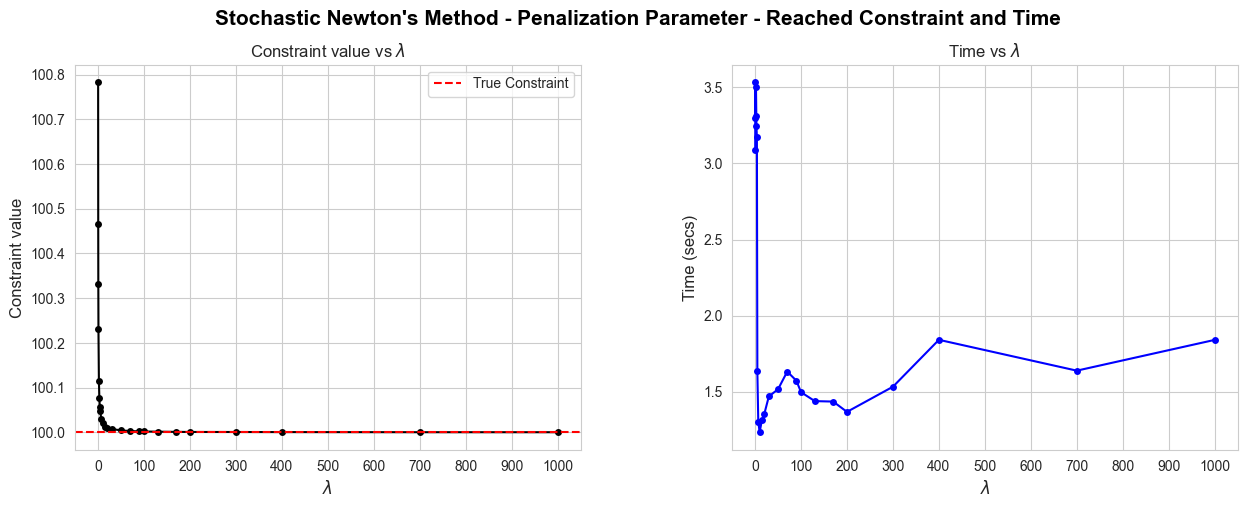

In [523]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()  

ax = sns.lineplot(y=reached_constraint_values, x=pen_lambda_grid, ax=axes[0],
                  marker='o', markersize=5, color='black', markeredgewidth=0)
ax = sns.lineplot(y=reached_constraint_times, x=pen_lambda_grid, ax=axes[1],
                  marker='o', markersize=5, color='blue', markeredgewidth=0)
axes[0].set_title(f'Constraint value vs $\\lambda$', fontsize=12)
axes[1].set_title(f'Time vs $\\lambda$', fontsize=12)
axes[0].set_xlabel('$\\lambda$', fontsize=12)
axes[1].set_xlabel('$\\lambda$', fontsize=12)
axes[0].set_ylabel('Constraint value', fontsize=12)
axes[1].set_ylabel('Time (secs)', fontsize=12)
axes[0].axhline(y=100, color='r', linestyle='--', label='True Constraint')
axes[0].set_xticks(np.arange(0, np.max(pen_lambda_grid)+50, 100))
axes[1].set_xticks(np.arange(0, np.max(pen_lambda_grid)+50, 100))
plt.suptitle('Stochastic Newton\'s Method - Penalization Parameter - Reached Constraint and Time', 
             fontsize=15, y=0.99, weight='bold', color='black', alpha=1)
axes[0].legend()
plt.subplots_adjust(hspace=1, wspace=0.3) 
plt.show()

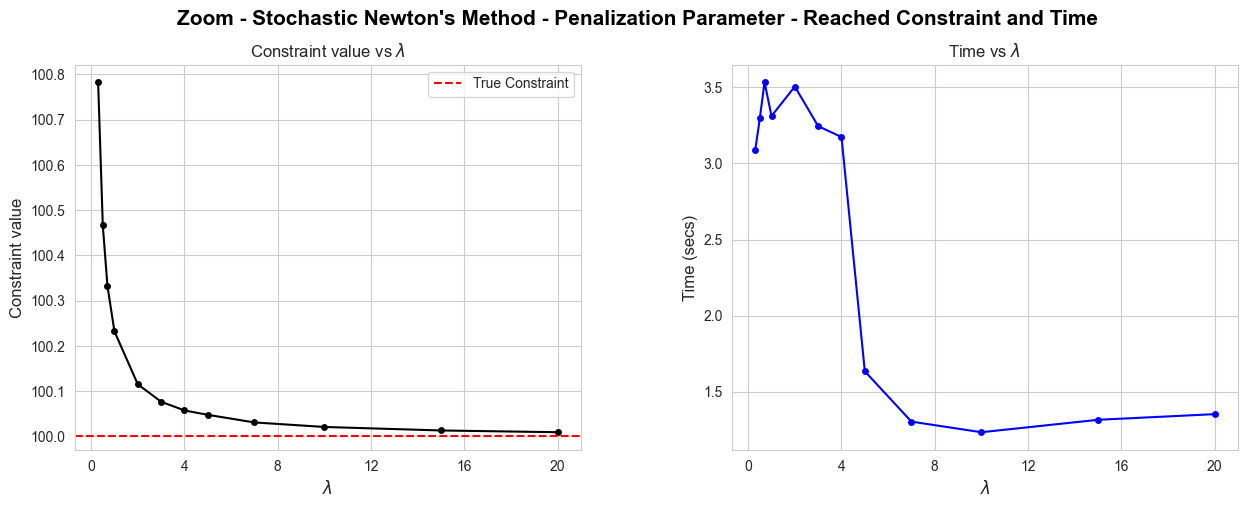

In [524]:
zoom_limit = 12
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()  

ax = sns.lineplot(y=reached_constraint_values[0:zoom_limit], x=pen_lambda_grid[0:zoom_limit], ax=axes[0],
                  marker='o', markersize=5, color='black', markeredgewidth=0)
ax = sns.lineplot(y=reached_constraint_times[0:zoom_limit], x=pen_lambda_grid[0:zoom_limit], ax=axes[1],
                  marker='o', markersize=5, color='blue', markeredgewidth=0)
axes[0].set_title(f'Constraint value vs $\\lambda$', fontsize=12)
axes[1].set_title(f'Time vs $\\lambda$', fontsize=12)
axes[0].set_xlabel('$\\lambda$', fontsize=12)
axes[1].set_xlabel('$\\lambda$', fontsize=12)
axes[0].set_ylabel('Constraint value', fontsize=12)
axes[1].set_ylabel('Time (secs)', fontsize=12)
axes[0].axhline(y=100, color='r', linestyle='--', label='True Constraint')
axes[0].set_yticks(np.round(np.arange(np.min(reached_constraint_values[0:zoom_limit]), 
                                      np.max(reached_constraint_values[0:zoom_limit])+0.1, 0.1),1))
axes[0].set_xticks(np.arange(0, np.max(pen_lambda_grid[0:zoom_limit])+1, 4))
axes[1].set_xticks(np.arange(0, np.max(pen_lambda_grid[0:zoom_limit])+1, 4))
plt.suptitle('Zoom - Stochastic Newton\'s Method - Penalization Parameter - Reached Constraint and Time', 
             fontsize=15, y=0.99, weight='bold', color='black', alpha=1)
axes[0].legend()
plt.subplots_adjust(hspace=1, wspace=0.3) 
plt.show()

Conclusions:

- When $\lambda$ is in $(0,4]$ the convergence is slower than when is $> 4$, even for large values of lambda, such as $1000$.


- For $\lambda >= 3$  the difference between the reached constraint and the tue is less than $0.1$. And for $\lambda >7$ there are non significative differences, in other words, the constraint is satisfy.

- Even for small $\lambda$ like $0.5$, $0.7$ and $1$, the constraint is almost fulfilled (the difference is less than $0.5$).